# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

In [1653]:
#!pip install shap

In [1654]:
#! pip install treeinterpreter

In [1655]:
#! pip install waterfallcharts

## Importing necessary libraries and data

In [7]:
#Import all the necessary packages

import pandas as pd
import numpy as np
import fastai.tabular
import plotly.express as px
import plotly.io as pio

import matplotlib
from matplotlib import pylab as plt
%matplotlib inline
from matplotlib import rcParams
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})


import seaborn as sns
import csv,json;
import os;

# Set the display option to suppress scientific notation and round the numbers to two decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import sklearn
import sklearn.inspection
from sklearn.inspection import plot_partial_dependence

## library to build ML model
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import tree

# Algorithms to use
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree;
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.inspection import plot_partial_dependence

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


# library to split data
from sklearn.model_selection import train_test_split 

# library to tune ML model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score;
from sklearn import metrics, model_selection, linear_model, neighbors, naive_bayes, ensemble, gaussian_process
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    precision_recall_curve,
    mean_squared_error,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay,
    make_scorer
)

# libraries to evaluate the ML model
from sklearn.metrics import f1_score, make_scorer

import scikitplot as skplt

from treeinterpreter import treeinterpreter as ti
import waterfall_chart
from waterfall_chart import plot as waterfall

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Setting the random seed to 1 for reproducibility of results
import random;
random.seed(1);
np.random.seed(1);

## Loading data

In [17]:
data1 = pd.read_csv("C://Users//wb592296//OneDrive - WBG//Documents//Personal//MIT IDSS Data Science and Machine Learning Program//9. Classification and Hypothesis Testing//Project  - Classification and Hypothesis Testing//ExtraaLearn.csv")
data1.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.06,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91,Email Activity,No,No,No,No,No,0


In [18]:
data1.sample(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
3497,EXT3498,28,Professional,Website,High,6,2264,5.45,Website Activity,No,No,No,Yes,No,1
1188,EXT1189,57,Unemployed,Website,High,1,415,2.25,Phone Activity,No,No,No,No,No,0
797,EXT798,57,Professional,Mobile App,High,2,331,2.10,Website Activity,No,No,No,No,No,0
47,EXT048,35,Professional,Mobile App,Medium,2,497,7.05,Email Activity,No,No,No,No,No,0
2428,EXT2429,22,Student,Website,Medium,2,75,1.98,Phone Activity,No,Yes,No,No,No,0


In [19]:
# Copying the data to another variable to avoid any changes to original data
data = data1.copy()

## Data Overview

In [20]:
# confirming the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 4612 rows and 15 columns.


In [21]:
# Checking datatypes and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [22]:
# Check for missing values
data.isnull().values.any()

False

#### Observations:

*   There are three different data types, int64, object and float64.
*   The variable status is a identifier variables and should be represented as string/object.
*   The variable 'rating' should be an outcome variable (object) but is represented as an integer.
*   All columns have 4612 observations.

In [23]:
# Checking for duplicate values
data.duplicated().sum()

0

In [24]:
#Detect the missing data in dataset
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [25]:
data.ID.nunique()

4612

In [26]:
# Remove ID column from data
data = data.drop(['ID'], axis = 1)

In [27]:
data['status']=data['status'].astype(object)

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Exploratory Data Analysis (EDA)

In [429]:
list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [430]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,age,website_visits,time_spent_on_website,page_views_per_visit
0,57,7,1639,1.86
1,56,2,83,0.32
2,52,3,330,0.07
3,53,4,464,2.06
4,23,4,600,16.91


In [431]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00,46.20,13.16,18.00,36.00,51.00,57.00,63.00
website_visits,4612.00,3.57,2.83,0.00,2.00,3.00,5.00,30.00
time_spent_on_website,4612.00,724.01,743.83,0.00,148.75,376.00,1336.75,2537.00
page_views_per_visit,4612.00,3.03,1.97,0.00,2.08,2.79,3.76,18.43


#### Observations:

*   The average age of leads is 46, which suggests that mainly middle-aged people are looking for online education maybe for upskilling/reskilling.

*   It looks like website_visits, time_spent_on_website and page_views_per_visit have outliers and the data is right-skewed.

In [432]:
# separate Numerical and categorical variables
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')
Numerical Variables:
['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']


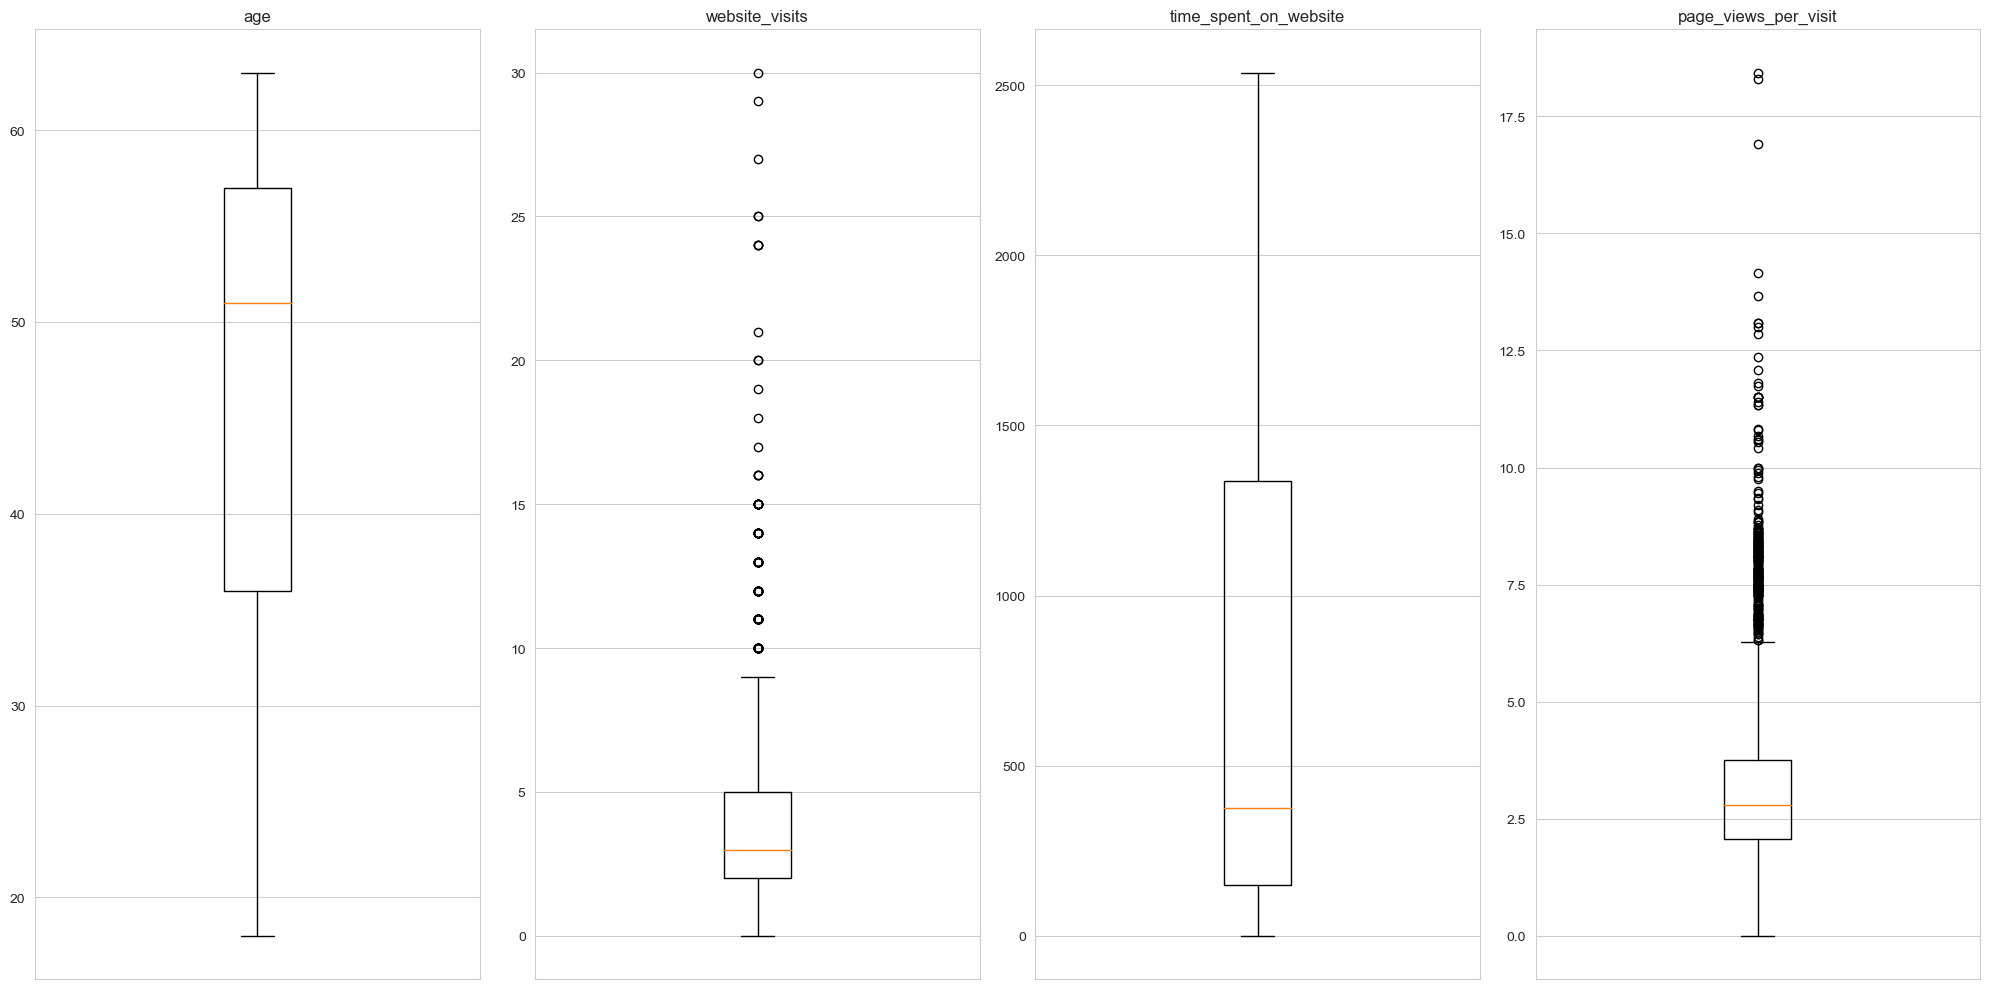

In [433]:
# Checking for outliers

plt.figure(figsize = (20, 10))
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(1, 4, i + 1)
    
    plt.boxplot(data[variable], whis = 1.5)
    
    plt.xticks([])
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

In [434]:
# Filter the Data to exclude rows where website_visits is higher than 10 and status is 1
website_visits_over_10 = data[(data['website_visits'] > 10) & (data['status'] == 1)]

# Now, calculate the value counts for the rows that have status=1 and have website visits higher than 10
website_visits_over_10_converted = website_visits_over_10['status'].value_counts()
print(website_visits_over_10_converted)

1    39
Name: status, dtype: int64


In [113]:
# Filter the Data to exclude rows where page_views_per_visit is higher than 6 and status is 1
page_views_per_visit_over_6 = data[(data['website_visits'] > 10) & (data['status'] == 1)]

# Now, calculate the value counts for the rows that have status=1 and have website visits higher than 10
page_views_per_visit_over_6_converted = page_views_per_visit_over_6['status'].value_counts()
print(page_views_per_visit_over_6_converted)

1    39
Name: status, dtype: int64


#### Observations:

*   The outliers for website_visits and page_views_per_visit are influencing the outcome variable. For values of these variables higher than their upper whiskers of 10 and 6, respectively, 39 leads converted. 


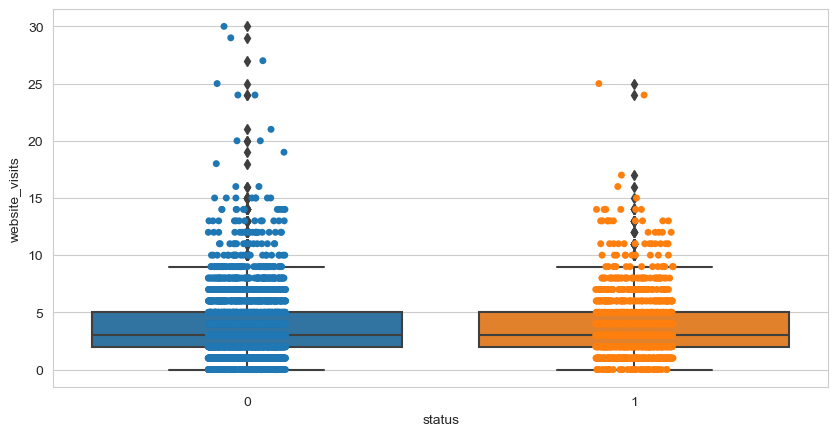

In [435]:
# the stripplot() function adds the dots to gives more info on the distribution of outliers
# relative to the points that lie inside the whiskers when spilt by 'status'. 
sns.set_style('whitegrid')
ax= sns.boxplot(x='status',y='website_visits',data=data)
ax = sns.stripplot(x="status", y="website_visits",data=data)

In [436]:
data.groupby(["status"])["website_visits"].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.00,3.58,2.87,0.00,2.00,3.00,5.00,30.00
1,1377.00,3.54,2.72,0.00,2.00,3.00,5.00,25.00


#### Observations:

*   Using further information from superimposing a splitpplot function on a boxplot function show that in the case of website_visits outliers (>10), although some leads convert to a paid customer, most do not. 

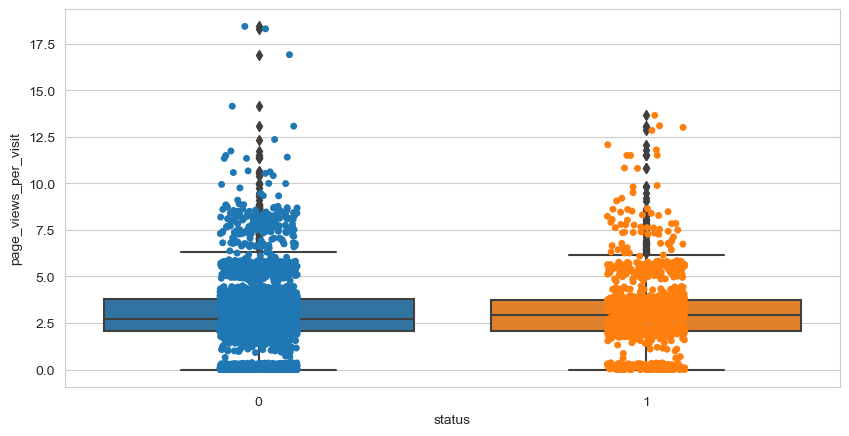

In [437]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='status',y='page_views_per_visit',data=data)
ax = sns.stripplot(x="status", y="page_views_per_visit",data=data)

In [438]:
# Perform cross-tabulation
cross_tab = pd.crosstab(data['page_views_per_visit'], data['status'])
print(cross_tab)

status                  0   1
page_views_per_visit         
0.00                  148  33
0.00                    1   1
0.01                    0   1
0.01                    1   0
0.02                    1   0
...                   ...  ..
13.66                   0   1
14.15                   1   0
16.91                   1   0
18.30                   1   0
18.43                   1   0

[2414 rows x 2 columns]


In [439]:
data.groupby(["status"])["page_views_per_visit"].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.00,3.03,2.00,0.00,2.07,2.71,3.77,18.43
1,1377.00,3.03,1.90,0.00,2.08,2.94,3.73,13.66


#### Observations:

*   In the case of page_views_per_visit, there is also a larger number of outliers that represent leads that do not convert compared to those that do. 

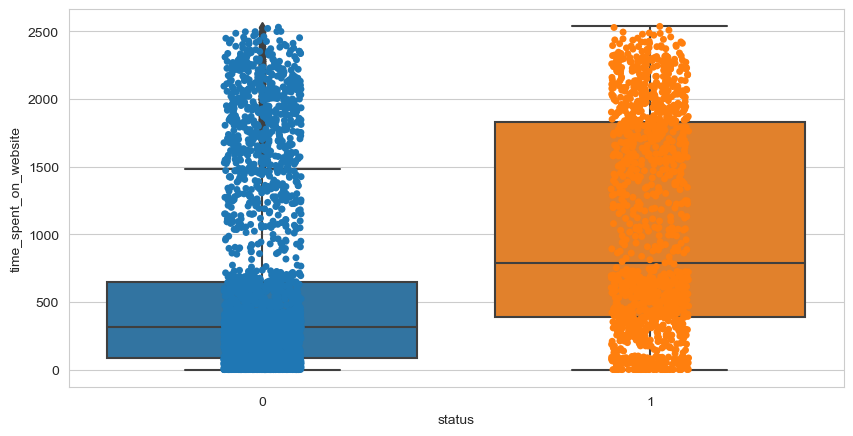

In [440]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='status',y='time_spent_on_website',data=data)
ax = sns.stripplot(x="status", y="time_spent_on_website",data=data)

In [441]:
# Perform cross-tabulation
cross_tab = pd.crosstab(data['time_spent_on_website'], data['status'])
print(cross_tab)

status                   0   1
time_spent_on_website         
0                      142  32
1                       59  12
2                        3   0
3                        1   1
4                        7   0
...                    ...  ..
2509                     0   1
2522                     1   0
2529                     0   1
2531                     1   0
2537                     0   1

[1623 rows x 2 columns]


In [442]:
data.groupby(["status"])["time_spent_on_website"].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.00,577.42,676.34,0.00,88.00,317.00,646.00,2531.00
1,1377.00,1068.40,780.86,0.00,390.00,789.00,1829.00,2537.00


#### Observations:

*   In the case of time_spent_on_website, whereas the boxplots of the leads that convert (status=1) and do not convert (status=0) show a significant distribution of outliers individually, the boxplot when these leads are combined does not indicate the existence of outliers. 

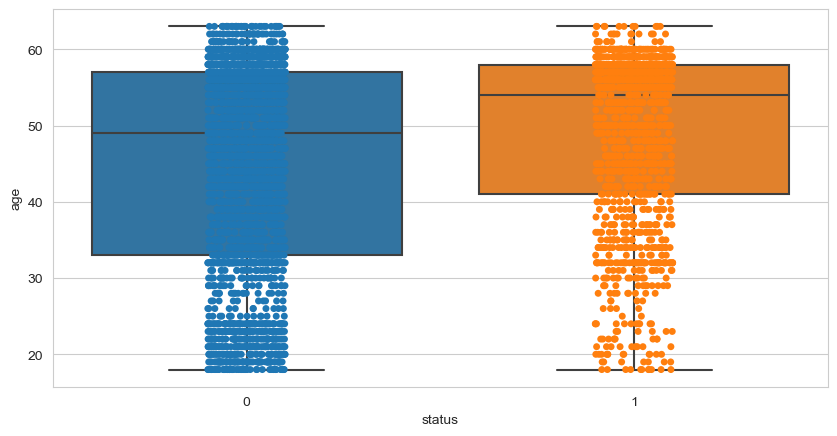

In [443]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='status',y='age',data=data)
ax = sns.stripplot(x="status", y="age",data=data)

#### Observations:

*   The median and IQR for age are higher for leads that convert compared to leads that don't convert.  

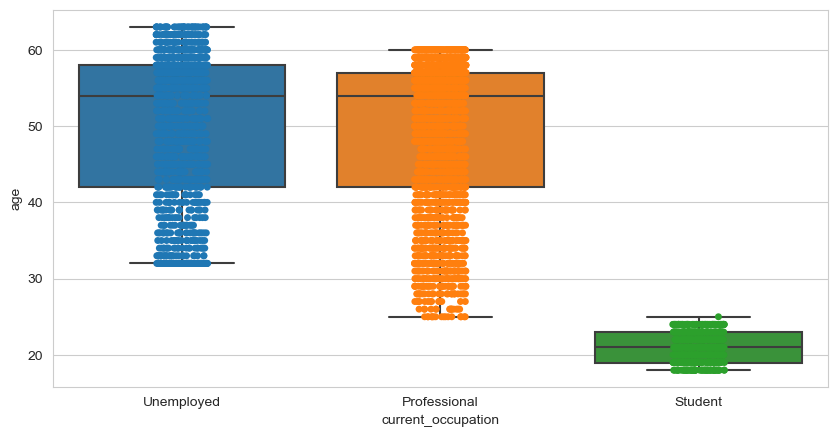

In [444]:
sns.set_style('whitegrid')
ax= sns.boxplot(x = 'current_occupation', y = 'age', data=data)
ax = sns.stripplot(x = 'current_occupation', y = 'age', data=data)

In [445]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00,49.35,9.89,25.00,42.00,54.00,57.00,60.00
Student,555.00,21.14,2.00,18.00,19.00,21.00,23.00,25.00
Unemployed,1441.00,50.14,10.00,32.00,42.00,54.00,58.00,63.00


In [446]:
# Perform cross-tabulation
cross_tab = pd.crosstab(data['current_occupation'], data['status'])
print(cross_tab)

status                 0    1
current_occupation           
Professional        1687  929
Student              490   65
Unemployed          1058  383


#### Observations:

*   The median and IQR age for Student leads are significantly lower compared to Professional and Unemployed leads.

age
Skew : -0.72


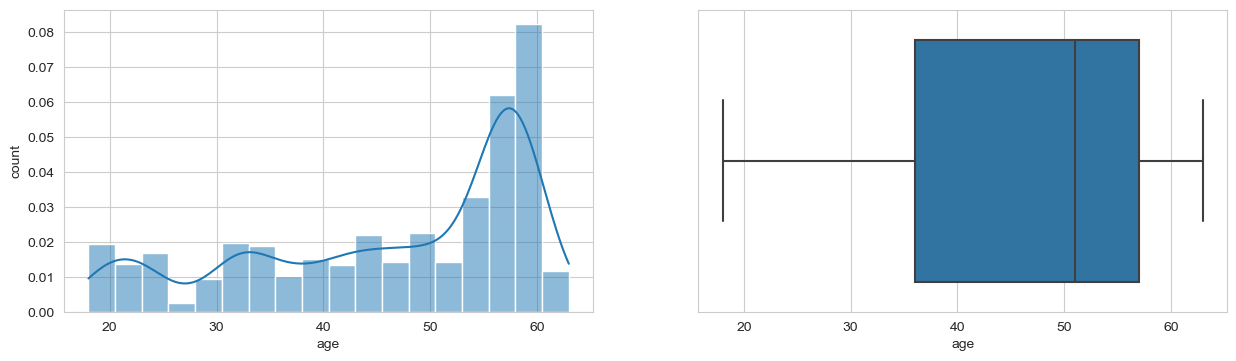

website_visits
Skew : 2.16


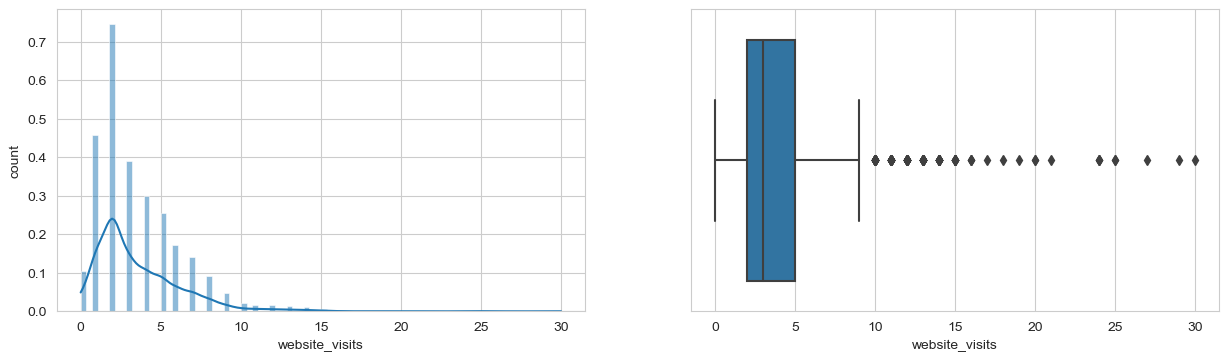

time_spent_on_website
Skew : 0.95


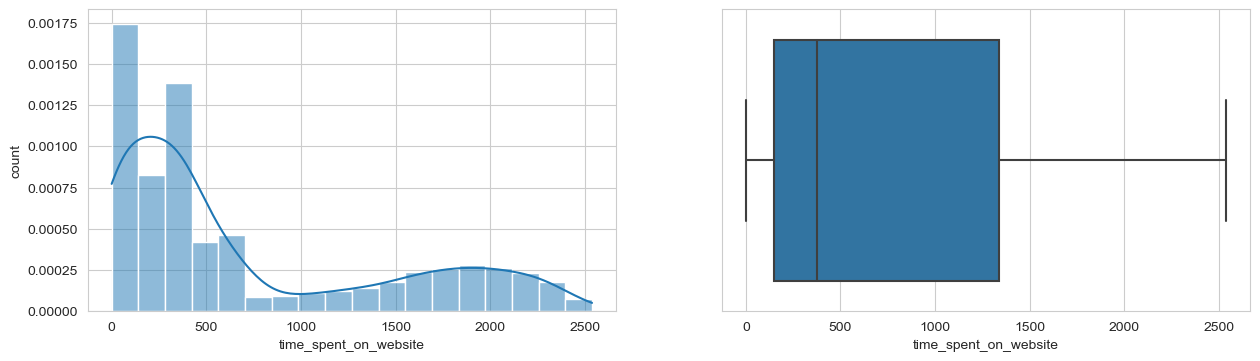

page_views_per_visit
Skew : 1.27


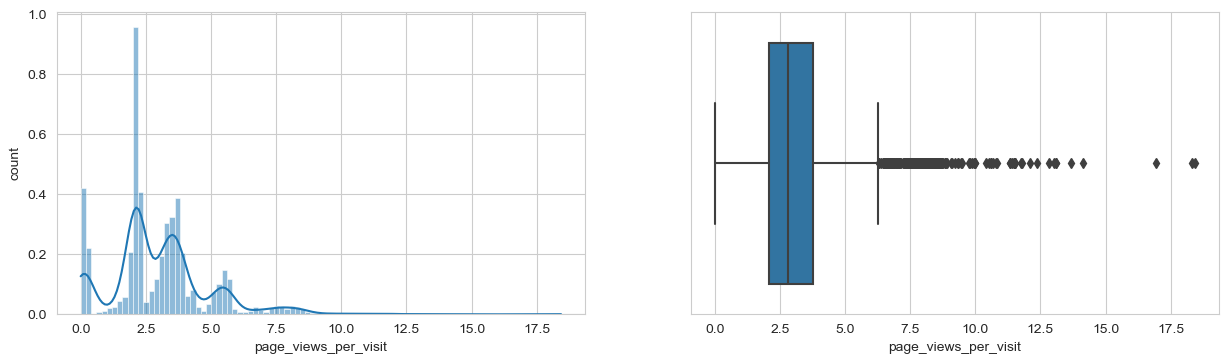

In [448]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(
        x=data[col],
        kde=True,
        stat='density')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

#### Observations:

*  Age is left skewed meaning there are relatively few young leads compared to older leads.
*  website_visits, time_spent_on_website and pages_viewed_per_minute are right skewed.  
*  website_visits and page_views_per_visit contain outliers revealing that some leads spend an unusual amount of visting the website and viewing different pages on the website 
*  However, Decision Tree based models are resistant to outliers. So, we don’t need to do normalisation or get rid of outliers because only ordering matters. 

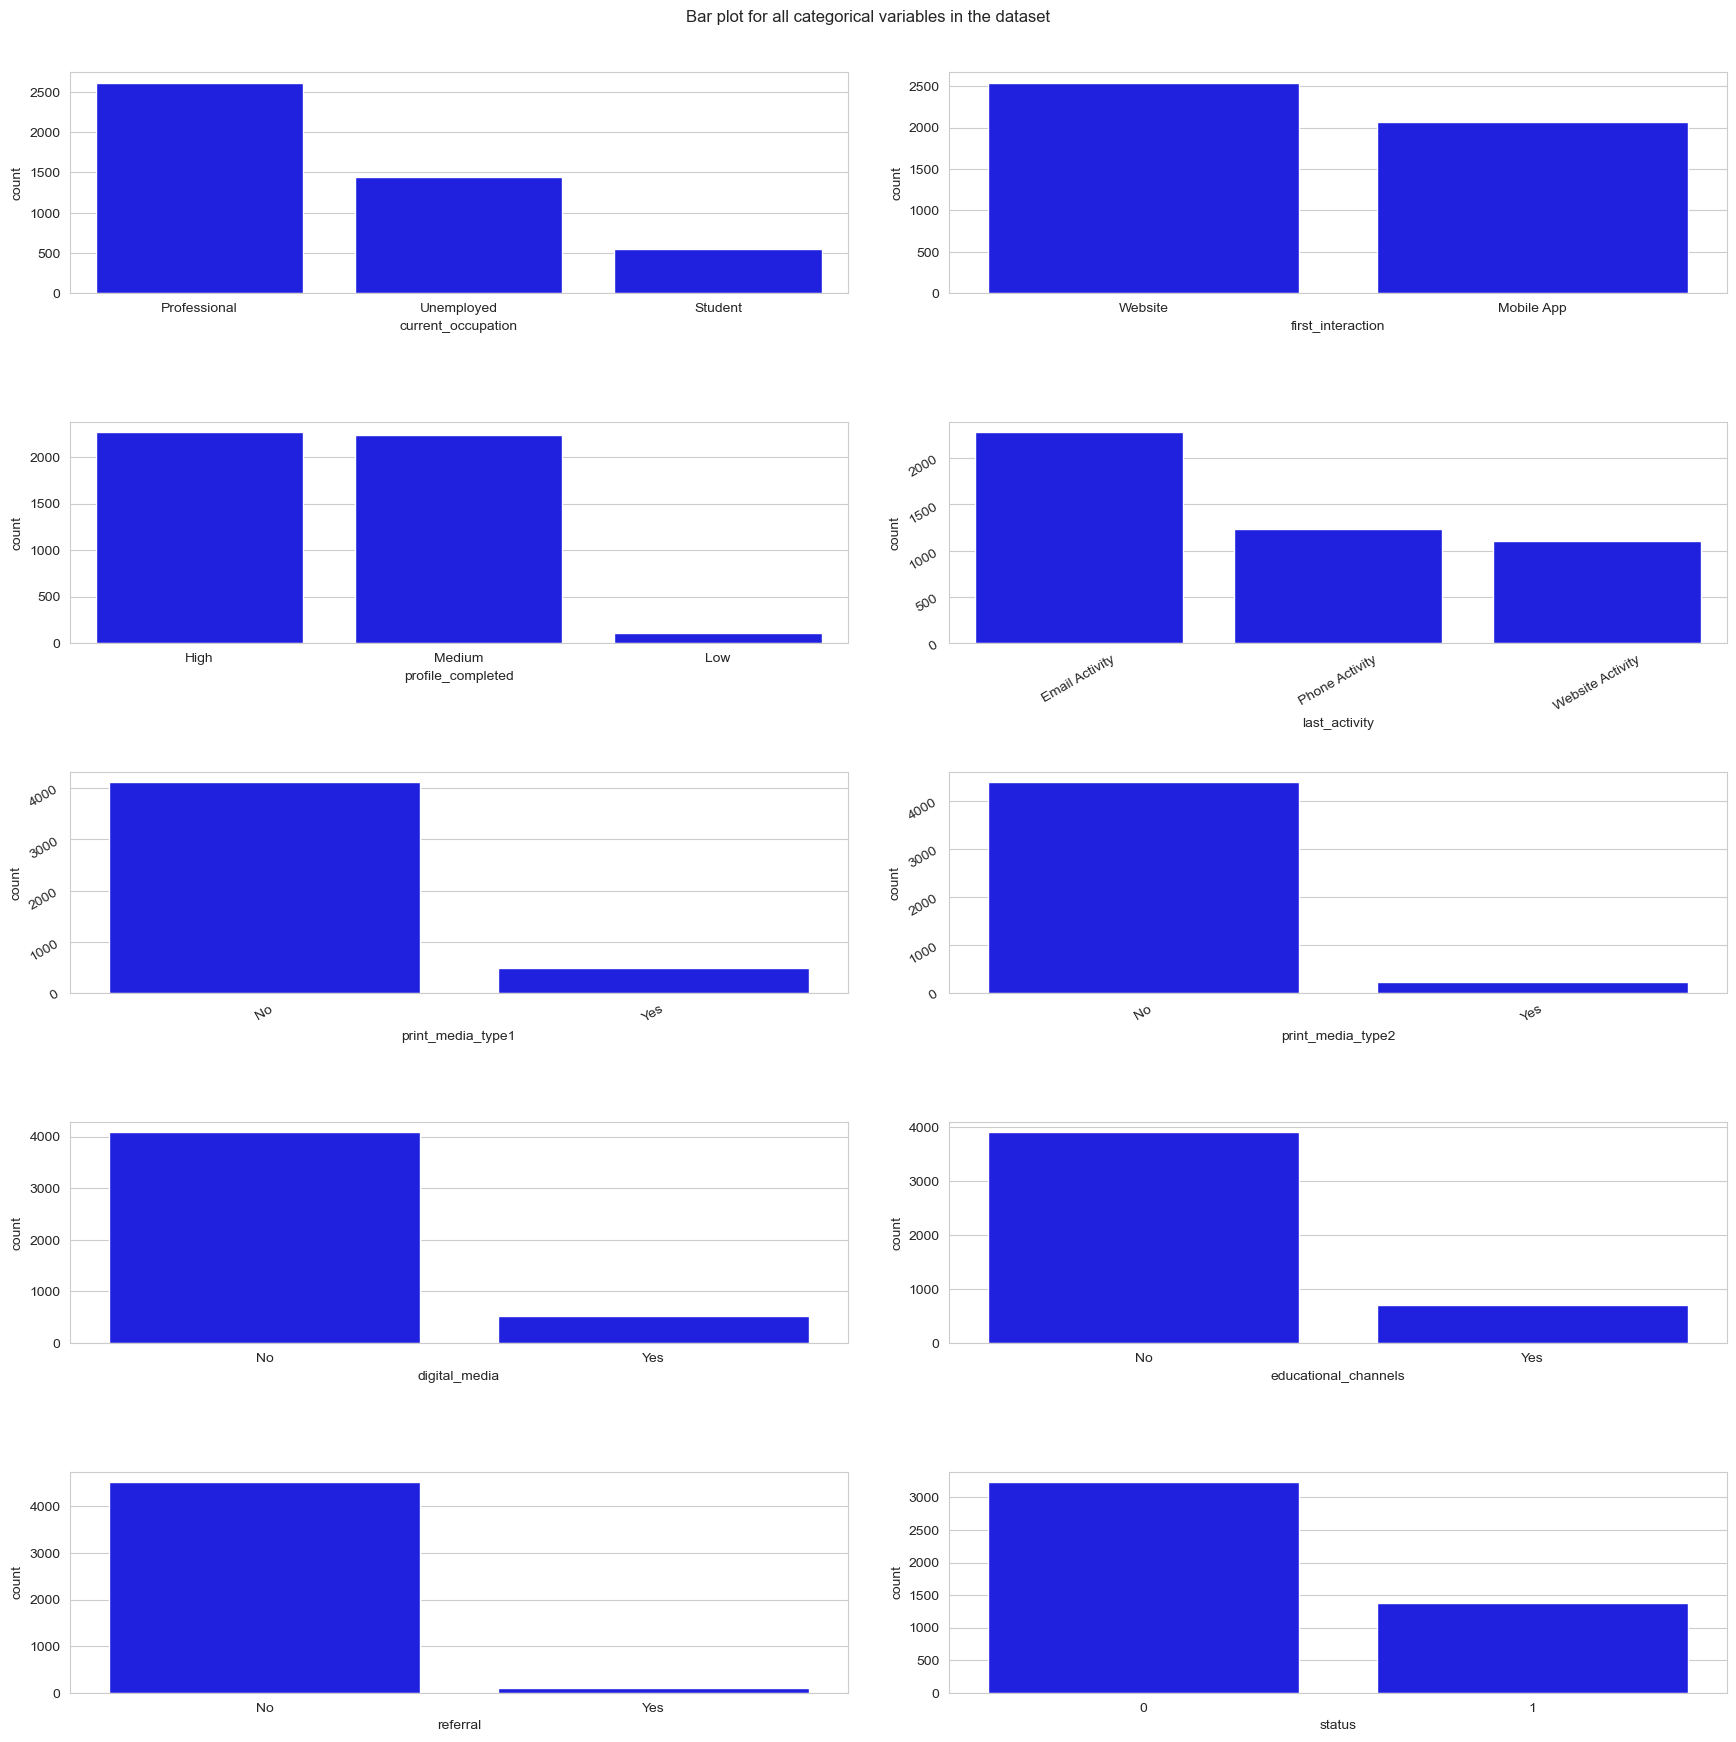

In [449]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize = (18, 18))

fig.suptitle('Bar plot for all categorical variables in the dataset', fontsize=12)
sns.countplot(ax = axes[0, 0], x = 'current_occupation', data = data, color = 'blue', 
              order = data['current_occupation'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'first_interaction', data = data, color = 'blue', 
              order = data['first_interaction'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'profile_completed', data = data, color = 'blue', 
              order = data['profile_completed'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'last_activity', data = data, color = 'blue', 
              order = data['last_activity'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'print_media_type1', data = data, color = 'blue', 
              order = data['print_media_type1'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'print_media_type2', data = data, color = 'blue', 
              order = data['print_media_type2'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'digital_media', data = data, color = 'blue', 
              order = data['digital_media'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'educational_channels', data = data, color = 'blue', 
              order = data['educational_channels'].value_counts().index);
sns.countplot(ax = axes[4, 0], x = 'referral', data = data, color = 'blue', 
              order = data['referral'].value_counts().index);
sns.countplot(ax = axes[4, 1], x = 'status', data = data, color = 'blue', 
              order = data['status'].value_counts().index);
axes[1][1].tick_params(labelrotation=30);
axes[2][0].tick_params(labelrotation=30);
axes[2][1].tick_params(labelrotation=30);

# Apply tight layout
plt.tight_layout(pad=3.0)  # Adjust the padding between plots
plt.show()

#### Observations:

*   Most leads come from the professional category, followed by unemployed and then student.

*   Slightly more leads visit the website relative to the mobile app.

*   Most leads complete a significant portion of their profile on the web/mobile app with just below 50% with medium completion and just below 50% with full completion. 

*   The last activity between leads and Extraalearn is mostly by email, followed by phone and then website. 

*   Marketing of ExtraaLearn by newspaper, magazine, digital media or education channels don't appear very effective as most leads did not hear about ExtraaLearn through these channels.

*   Very few leads are generated through referrals.

*   Only about a third of all leads convert to a paying customer.



In [450]:
# table of group means arranged by occupation and status on the rows
data.pivot_table(index=['current_occupation', 'status'])

age  page_views_per_visit  time_spent_on_website  \
current_occupation status                                                      
Professional       0      49.04                  3.00                 558.72   
                   1      49.90                  3.02                1043.27   
Student            0      21.17                  3.27                 632.29   
                   1      20.92                  3.16                1002.58   
Unemployed         0      50.05                  2.95                 581.83   
                   1      50.38                  3.01                1140.51   

                           website_visits  
current_occupation status                  
Professional       0                 3.57  
                   1                 3.56  
Student            0                 3.82  
                   1                 3.66  
Unemployed         0                 3.48  
                   1                 3.45

In [451]:
def stacked_barchart(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart.
    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    predictor (str): The name of the independent variable (column) in the DataFrame.
    target (str): The name of the target variable (column) in the DataFrame.
    """
    unique_predictor_count = data[predictor].nunique() # Calculate the number of unique values in the predictor column
    least_frequent_category = data[target].value_counts().idxmin() # Determine the least frequent category in the target column
    crosstab_with_margins = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=least_frequent_category, 
    ascending=False) # Create a crosstab with margins (totals) and sort by the least frequent category
    print(crosstab_with_margins)
    print("-" * 120)
    normalized_crosstab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=least_frequent_category, 
    ascending=False) # Create a normalized crosstab and sort by the least frequent category
    normalized_crosstab.plot(kind="bar", stacked=True, figsize=(unique_predictor_count + 5, 5)) # Plot the stacked bar chart
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


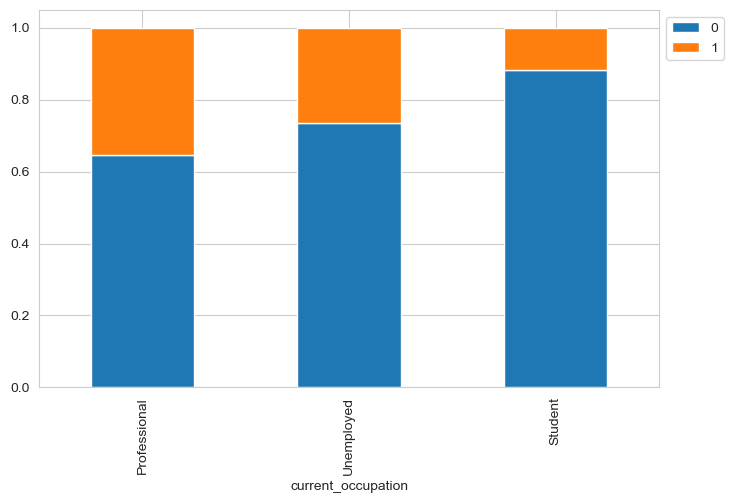

In [452]:
stacked_barchart(data, "current_occupation", "status")

#### Observations:

*   57% of all leads come from Professionals compared to 32% from Unemployed and 12% from Students.

*   Professionals are more likely to be converted to a paid customer (36%) versus Unemployed (27%) and Students (12%).

*   Professionals and Unemployed have an average age of about 50 commpared to Students with a mean age of about 20.

*   Leads that convert spend almost double the time on the website compared to those that do not convert for all occupations. 

*   However there appear to be no discernible difference in the average number of website visits between leads converted and leads not converted for all occupations.



In [453]:
# table of group means arranged by profile completed and status on the rows
data.pivot_table(index=['profile_completed', 'status'])

age  page_views_per_visit  time_spent_on_website  \
profile_completed status                                                      
High              0      44.67                  3.05                 618.73   
                  1      48.54                  2.98                 944.39   
Low               0      43.63                  3.12                 340.93   
                  1      47.88                  3.75                 232.25   
Medium            0      45.59                  3.00                 560.35   
                  1      48.95                  3.12                1361.53   

                          website_visits  
profile_completed status                  
High              0                 3.63  
                  1                 3.39  
Low               0                 3.91  
                  1                 4.62  
Medium            0                 3.53  
                  1                 3.85

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


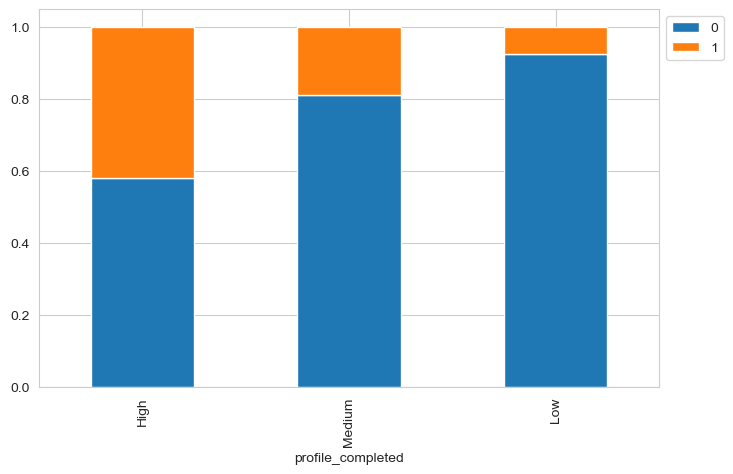

In [454]:
stacked_barchart(data, "profile_completed", "status")

#### Observations:

*   The average age of leads that completed a profile at all is between 43 and 49.

*   Just over 40% of leads with a high profile completion converted compared to just under 20% with a medium profile and <10% with a low profile.

*   However a great percentage of the medium profile leads who converted spent longer time on the internet.

*   Leads that include more personal details in their profile have a higher conversion rate of 42% versus medium profile (19%) and low profile (7%).


In [455]:
# table of group means arranged by profile completed and status on the rows
data.pivot_table(index=['first_interaction', 'status'])

age  page_views_per_visit  time_spent_on_website  \
first_interaction status                                                      
Mobile App        0      46.11                  3.04                 649.76   
                  1      47.13                  3.06                1317.89   
Website           0      43.87                  3.00                 480.55   
                  1      48.95                  3.02                1021.47   

                          website_visits  
first_interaction status                  
Mobile App        0                 3.71  
                  1                 3.82  
Website           0                 3.40  
                  1                 3.48

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


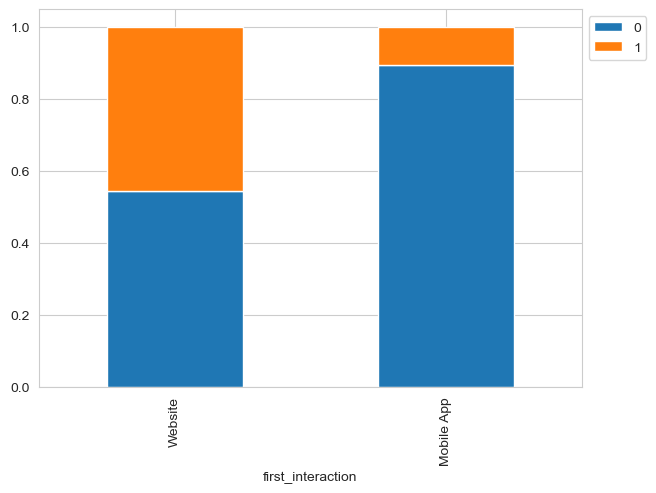

In [456]:
stacked_barchart(data, "first_interaction", "status")

#### Observations:

*   Leads whose first interaction with ExtraaLearn was through the website had a greater conversion rate (46%) compared to the mobile app (11%).


In [136]:
# table of group means arranged by last activity completed and status on the rows
data.pivot_table(index=['last_activity', 'status'])

age  page_views_per_visit  time_spent_on_website  \
last_activity    status                                                      
Email Activity   0      45.55                  2.91                 553.25   
                 1      48.41                  3.01                1093.87   
Phone Activity   0      44.90                  3.09                 670.77   
                 1      49.35                  3.08                 945.43   
Website Activity 0      44.57                  3.19                 500.19   
                 1      48.65                  3.03                1103.25   

                         website_visits  
last_activity    status                  
Email Activity   0                 3.50  
                 1                 3.61  
Phone Activity   0                 3.64  
                 1                 3.35  
Website Activity 0                 3.68  
                 1                 3.53

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


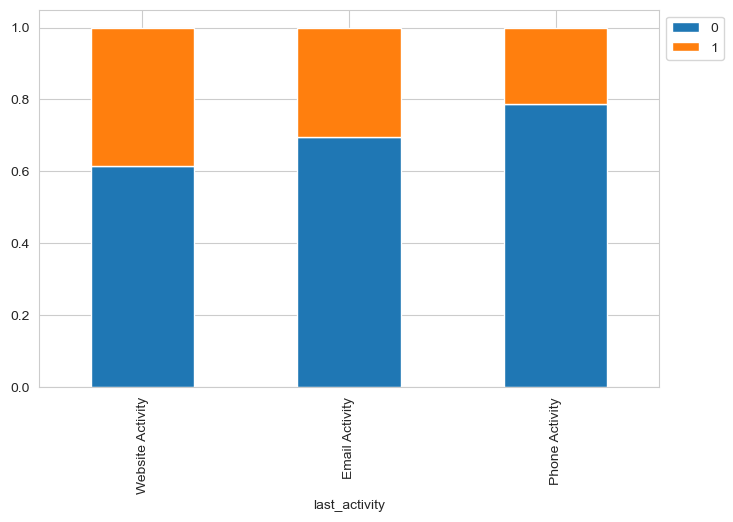

In [137]:
stacked_barchart(data, "last_activity", "status")

#### Observations:

*   Leads whose last activity with ExtraaLearn was through the website had a greater conversion rate (38%) compared to email (30%) and phone (21%).

*   Regardless of the last activity, those leads that convert spend a longer time on the website relative to those that don't (about double in the case of website and email last activity).

In [138]:
# table of group means arranged by print_media_type1 completed and status on the rows
data.pivot_table(index=['print_media_type1', 'status'])

age  page_views_per_visit  time_spent_on_website  \
print_media_type1 status                                                      
No                0      45.14                  3.04                 578.65   
                  1      48.61                  3.05                1083.10   
Yes               0      45.22                  2.94                 566.91   
                  1      49.07                  2.87                 955.75   

                          website_visits  
print_media_type1 status                  
No                0                 3.60  
                  1                 3.50  
Yes               0                 3.37  
                  1                 3.79

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


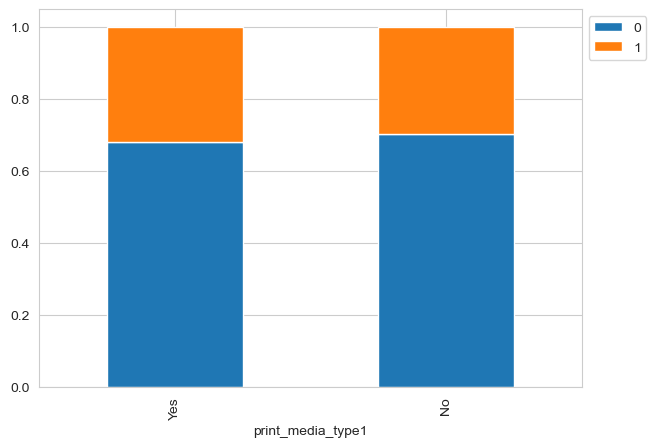

In [139]:
stacked_barchart(data, "print_media_type1", "status")

#### Observations:

*   About 30% of leads that heard about ExtraaLearn through a newspaper ad converted.


In [140]:
# table of group means arranged by print_media_type2 completed and status on the rows
data.pivot_table(index=['print_media_type2', 'status'])

age  page_views_per_visit  time_spent_on_website  \
print_media_type2 status                                                      
No                0      45.12                  3.02                 573.25   
                  1      48.66                  3.02                1066.91   
Yes               0      45.77                  3.10                 658.61   
                  1      48.73                  3.17                1094.25   

                          website_visits  
print_media_type2 status                  
No                0                 3.57  
                  1                 3.55  
Yes               0                 3.75  
                  1                 3.28

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


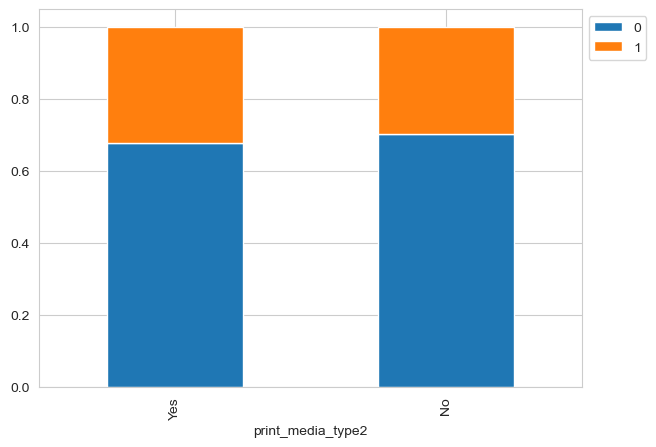

In [142]:
stacked_barchart(data, "print_media_type2", "status")

#### Observations:

*   About 32% of leads that heard about ExtraaLearn through a magazine ad converted. 

*   More leads heard about ExtraaLearn through a newspaper ad (497) versus a magazine ad (233).

In [143]:
# table of group means arranged by digital_media completed and status on the rows
data.pivot_table(index=['digital_media', 'status'])

age  page_views_per_visit  time_spent_on_website  \
digital_media status                                                      
No            0      45.03                  3.03                 570.85   
              1      48.67                  3.02                1053.35   
Yes           0      46.14                  3.02                 630.03   
              1      48.61                  3.08                1176.69   

                      website_visits  
digital_media status                  
No            0                 3.59  
              1                 3.52  
Yes           0                 3.52  
              1                 3.64

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


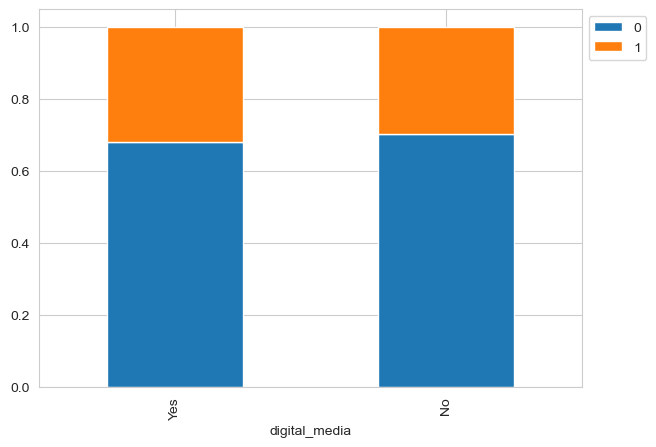

In [144]:
stacked_barchart(data, "digital_media", "status")

#### Observations:

*   About 32% of leads that heard about ExtraaLearn through digital media converted. 

*   More leads heard about ExtraaLearn through digital media (527) versus a newspaper ad or a magazine ad.

In [145]:
# table of group means arranged by educational_channels completed and status on the rows
data.pivot_table(index=['educational_channels', 'status'])

age  page_views_per_visit  \
educational_channels status                               
No                   0      45.22                  3.01   
                     1      48.79                  2.96   
Yes                  0      44.81                  3.09   
                     1      47.93                  3.44   

                             time_spent_on_website  website_visits  
educational_channels status                                         
No                   0                      589.02            3.58  
                     1                     1072.01            3.51  
Yes                  0                      515.18            3.57  
                     1                     1046.78            3.69

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


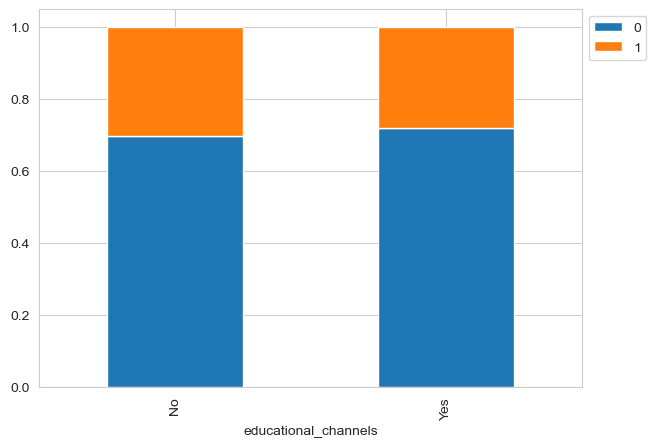

In [146]:
stacked_barchart(data, "educational_channels", "status")

#### Observations:

*   About 27% of leads that heard about ExtraaLearn through educational channels converted.

*   More leads heard about ExtraaLearn through educational channels (705) compared to digital media, a newspaper or a magazine.

In [147]:
# table of group means arranged by referral and status on the rows
data.pivot_table(index=['referral', 'status'])

age  page_views_per_visit  time_spent_on_website  \
referral status                                                      
No       0      45.18                  3.02                 576.42   
         1      48.70                  3.04                1062.56   
Yes      0      42.53                  3.45                 684.03   
         1      47.97                  2.77                1190.06   

                 website_visits  
referral status                  
No       0                 3.58  
         1                 3.53  
Yes      0                 3.67  
         1                 3.78

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


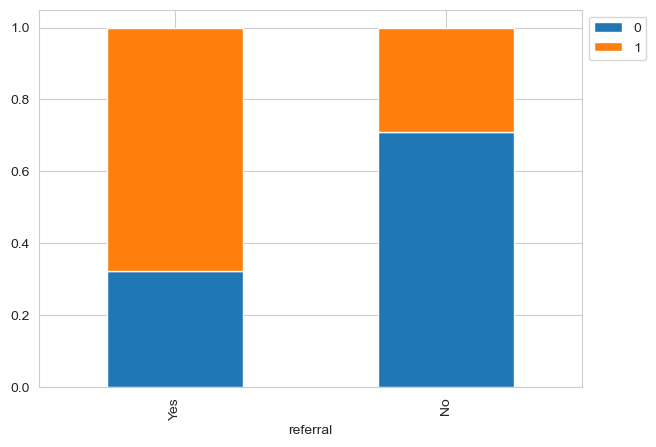

In [149]:
stacked_barchart(data, "referral", "status")

#### Observations:

*   About 68% of leads that heard about ExtraaLearn through referral converted.

*   Referrals appear to make a significant difference in whether a lead converts or not. However, only 93 leads (2%) heard about ExtraaLearn through referrals.

*   Regardless of where leads heard about ExtraaLearn, those that convert spend significantly more time on the website than those that don't convert.

*   Only about 45% of all leads heard of ExtraaLearn through one or more of these first channels of interaction.

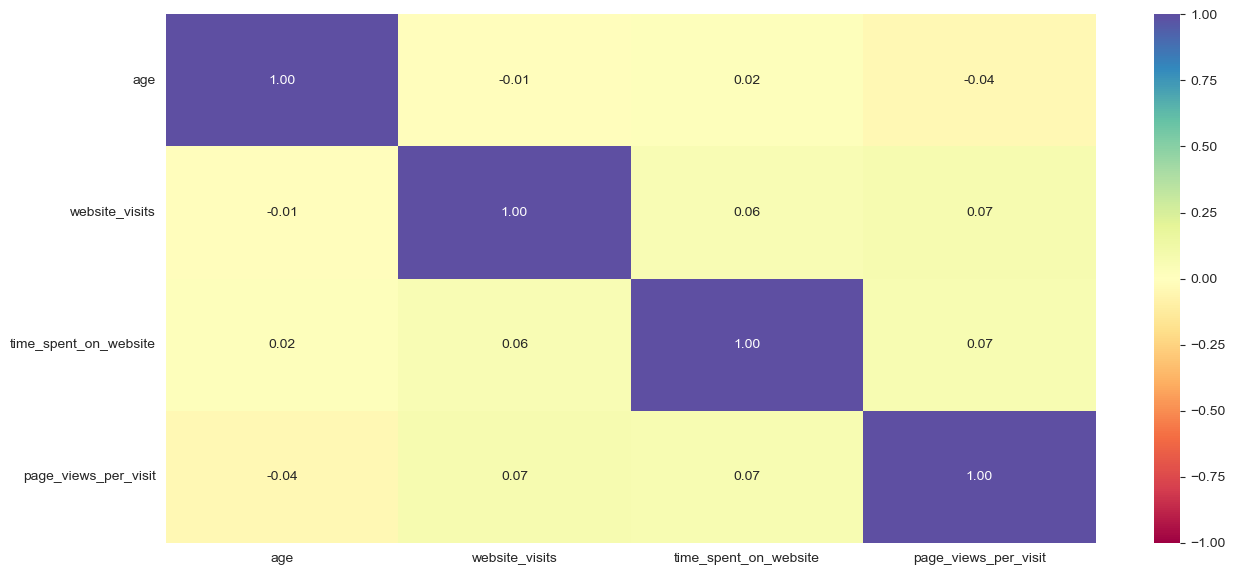

In [150]:
# Correlation check
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

### Observations:

*   The numerical variables have very low correlation.

## Data Preprocessing

In [115]:
data = pd.get_dummies(data, drop_first = True)

In [116]:
data.columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes', 'status_1'],
      dtype='object')

In [117]:
train_df, test_df = sklearn.model_selection.train_test_split(data, test_size=0.3, random_state=42)

In [118]:
train_df.shape[0], test_df.shape[0]

(3228, 1384)

In [119]:
# Seperate input features from target feature
# Split the data into training and validation sets
X_train, y_train = train_df.drop(['status_1'], axis = 1), train_df.status_1
X_test, y_test = test_df.drop(['status_1'], axis = 1), test_df.status_1

In [120]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
1803,58,6,576,3.78,0,0,1,0,1,0,0,0,0,0,0,0
3728,24,9,2173,2.01,1,0,0,0,1,0,0,0,0,1,0,0
3887,57,4,69,3.63,0,0,1,0,1,0,0,0,0,0,0,0
3415,36,4,518,3.35,0,0,1,0,0,1,0,0,0,0,0,0
4248,32,6,295,5.38,0,1,0,0,0,0,0,0,0,0,0,0


In [121]:
X_test.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
1073,23,7,243,3.51,1,0,0,0,0,0,0,0,0,0,0,0
2749,32,0,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0
1374,45,2,179,5.48,0,1,0,0,1,0,0,1,0,0,1,0
4484,35,7,56,3.98,0,0,1,1,0,1,0,0,0,0,0,0
3824,24,2,2275,3.14,1,0,0,0,1,0,0,0,0,0,0,0


In [122]:
# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train.shape);
print('X Test Shape:', X_test.shape);
print('Y Train Shape:', y_train.shape);
print('Y Test Shape:', y_test.shape);

X Train Shape: (3228, 16)
X Test Shape: (1384, 16)
Y Train Shape: (3228,)
Y Test Shape: (1384,)


In [123]:
y_train.value_counts()/len(y_train)*100

0   69.95
1   30.05
Name: status_1, dtype: float64

In [124]:
y_test.value_counts()/len(y_test)*100

0   70.59
1   29.41
Name: status_1, dtype: float64

In [125]:
print(X_train.columns)

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'],
      dtype='object')


In [126]:
# Copying X_train and y_train to avoid any changes to original data
X_train1 = X_train.copy()
y_train1 = y_train.copy()

## Building a Decision Tree model

In [127]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [128]:
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted));
  cm = confusion_matrix(actual, predicted);
  plt.figure(figsize = (8,5));
  sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Customer - Yes', 'Customer - No'], yticklabels = ['Customer - Yes', 'Customer - No'])
  plt.ylabel('Actual'); plt.xlabel('Predicted');
  plt.show()

In [129]:
# defining the ML model to build
# Dataset is imbalanced, so set the class_weight hyperparameter = {0: 0.3, 1: 0.7} which to adjust imbalance in the data.
model = DecisionTreeClassifier(random_state=1, class_weight={0: 0.3, 1: 0.7})

# training the ML model on the train data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2258
           1       1.00      1.00      1.00       970

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



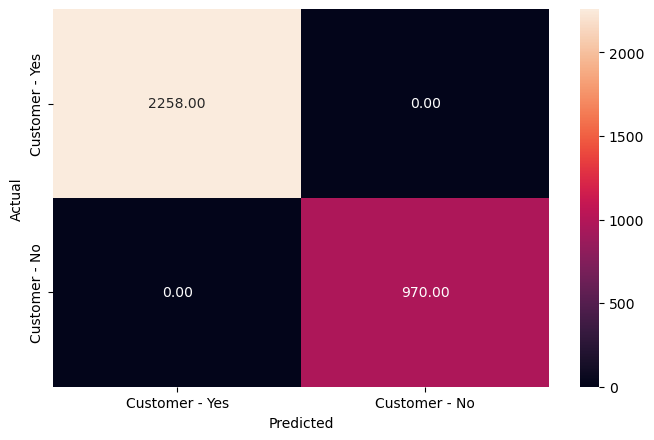

In [130]:
# Checking performance on the training data
y_pred_train_rf = model.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

In [131]:
round(sklearn.metrics.mean_absolute_error(model.predict(X_train), y_train), 2)

0.0

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       977
           1       0.68      0.69      0.68       407

    accuracy                           0.81      1384
   macro avg       0.77      0.78      0.77      1384
weighted avg       0.81      0.81      0.81      1384



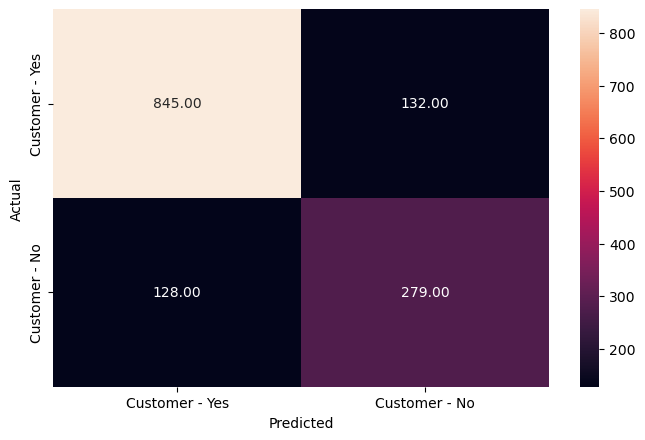

In [132]:
# Checking performance on the test data
y_pred_test_rf = model.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [133]:
round(sklearn.metrics.mean_absolute_error(model.predict(X_test), y_test), 2)

24.41

### Observations:

 - The Decision tree classifier has overfit the data as the performance using the training data is significantly better than the performance with the validation data.
 
 - In particular, the recall on the training data is 1, while the recall on the test data is only 0.69 for class 1.

## Do we need to prune the tree?

### Cost Complexity Pruning

In [134]:
# Post-pruning is the opposite of pre-pruning. It allows the Decision Tree model to grow to its full depth.
# Once the model grows to its full depth, tree branches are removed to prevent the model from overfitting. 
# ccp_alpha is the hyperparameter that can be tuned for post-pruning and minimizing overfitting
# ccp_alphas gives minimum leaf value of decision tree  
# Each ccp_aphas will create a different classifier and choose best out of it
dm = DecisionTreeClassifier(random_state=24, class_weight={0: 0.3, 1: 0.7})
path = dm.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

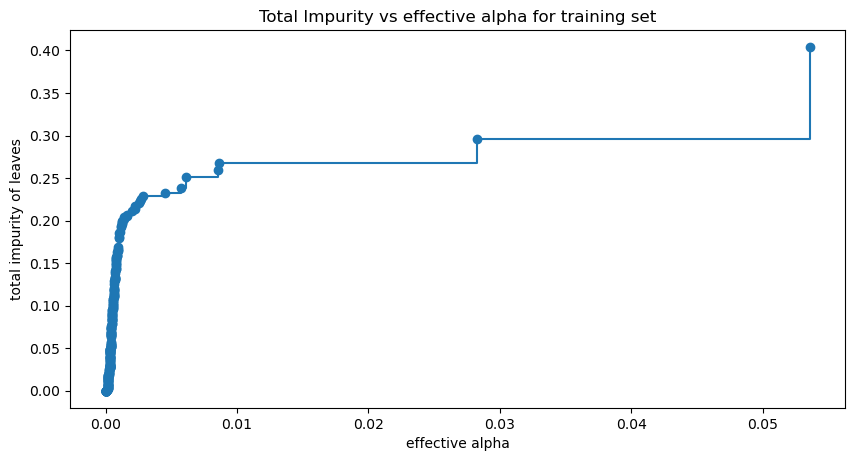

<Figure size 1000x800 with 0 Axes>

In [135]:
fig, ax = plt.subplots()
plt.figure(figsize=(10, 8))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [136]:
dms = []
for ccp_alpha in ccp_alphas:
    dm = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dm.fit(X_train, y_train)
    dms.append(dm)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dms[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09635550140368382


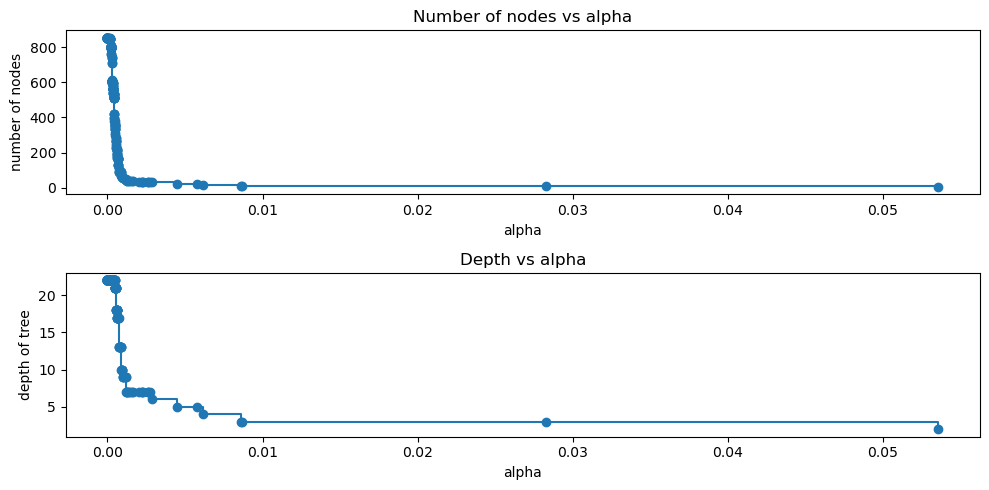

In [137]:
dms = dms[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dm.tree_.node_count for dm in dms]
depth = [dm.tree_.max_depth for dm in dms]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

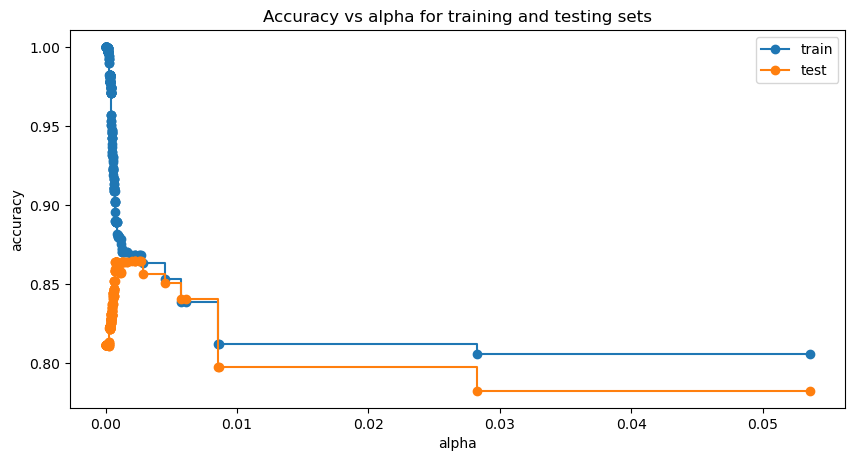

In [138]:
# Visualizing the accuracy score for train and test set.
# Choose the point that will have low bias(low training error) and low variance(low test error)
train_scores = [dm.score(X_train, y_train) for dm in dms]
test_scores = [dm.score(X_test, y_test) for dm in dms]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

From the above plot, when alpha ~ 0.001, we get the maximum test accuracy. 

In [176]:
# defining the ML model to build
dm = DecisionTreeClassifier(random_state=1, class_weight={0: 0.3, 1: 0.7}, ccp_alpha=0.002)

# training the ML model on the train data
dm.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.3, 1: 0.7},
                       random_state=1)

alpha ~ 0.001 will give low bias and low variance.

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2258
           1       0.69      0.88      0.77       970

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.83      3228
weighted avg       0.86      0.84      0.85      3228



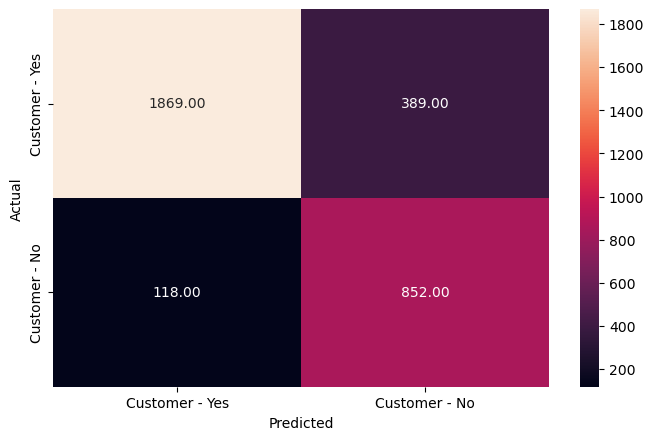

In [177]:
# Checking performance on the training data
y_pred_train_rf = dm.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

In [178]:
round(sklearn.metrics.mean_absolute_error(dm.predict(X_train), y_train), 2)

30.77

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       977
           1       0.67      0.87      0.76       407

    accuracy                           0.84      1384
   macro avg       0.81      0.85      0.82      1384
weighted avg       0.86      0.84      0.84      1384



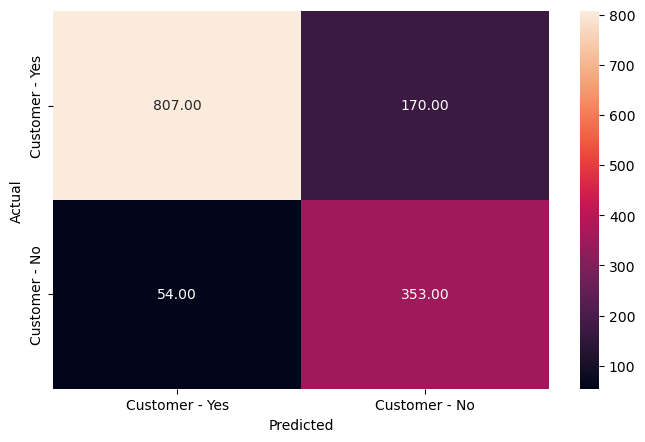

In [179]:
# Checking performance on the test data
y_pred_test_rf = dm.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [180]:
round(sklearn.metrics.mean_absolute_error(dm.predict(X_test), y_test), 2)

31.36

- The train and test performances are much more similar now, so we can say that the model is able to generalize well
- Recall has improved from 0.69 to 0.87 for the test data.

## **Visualizing the Decision Tree**

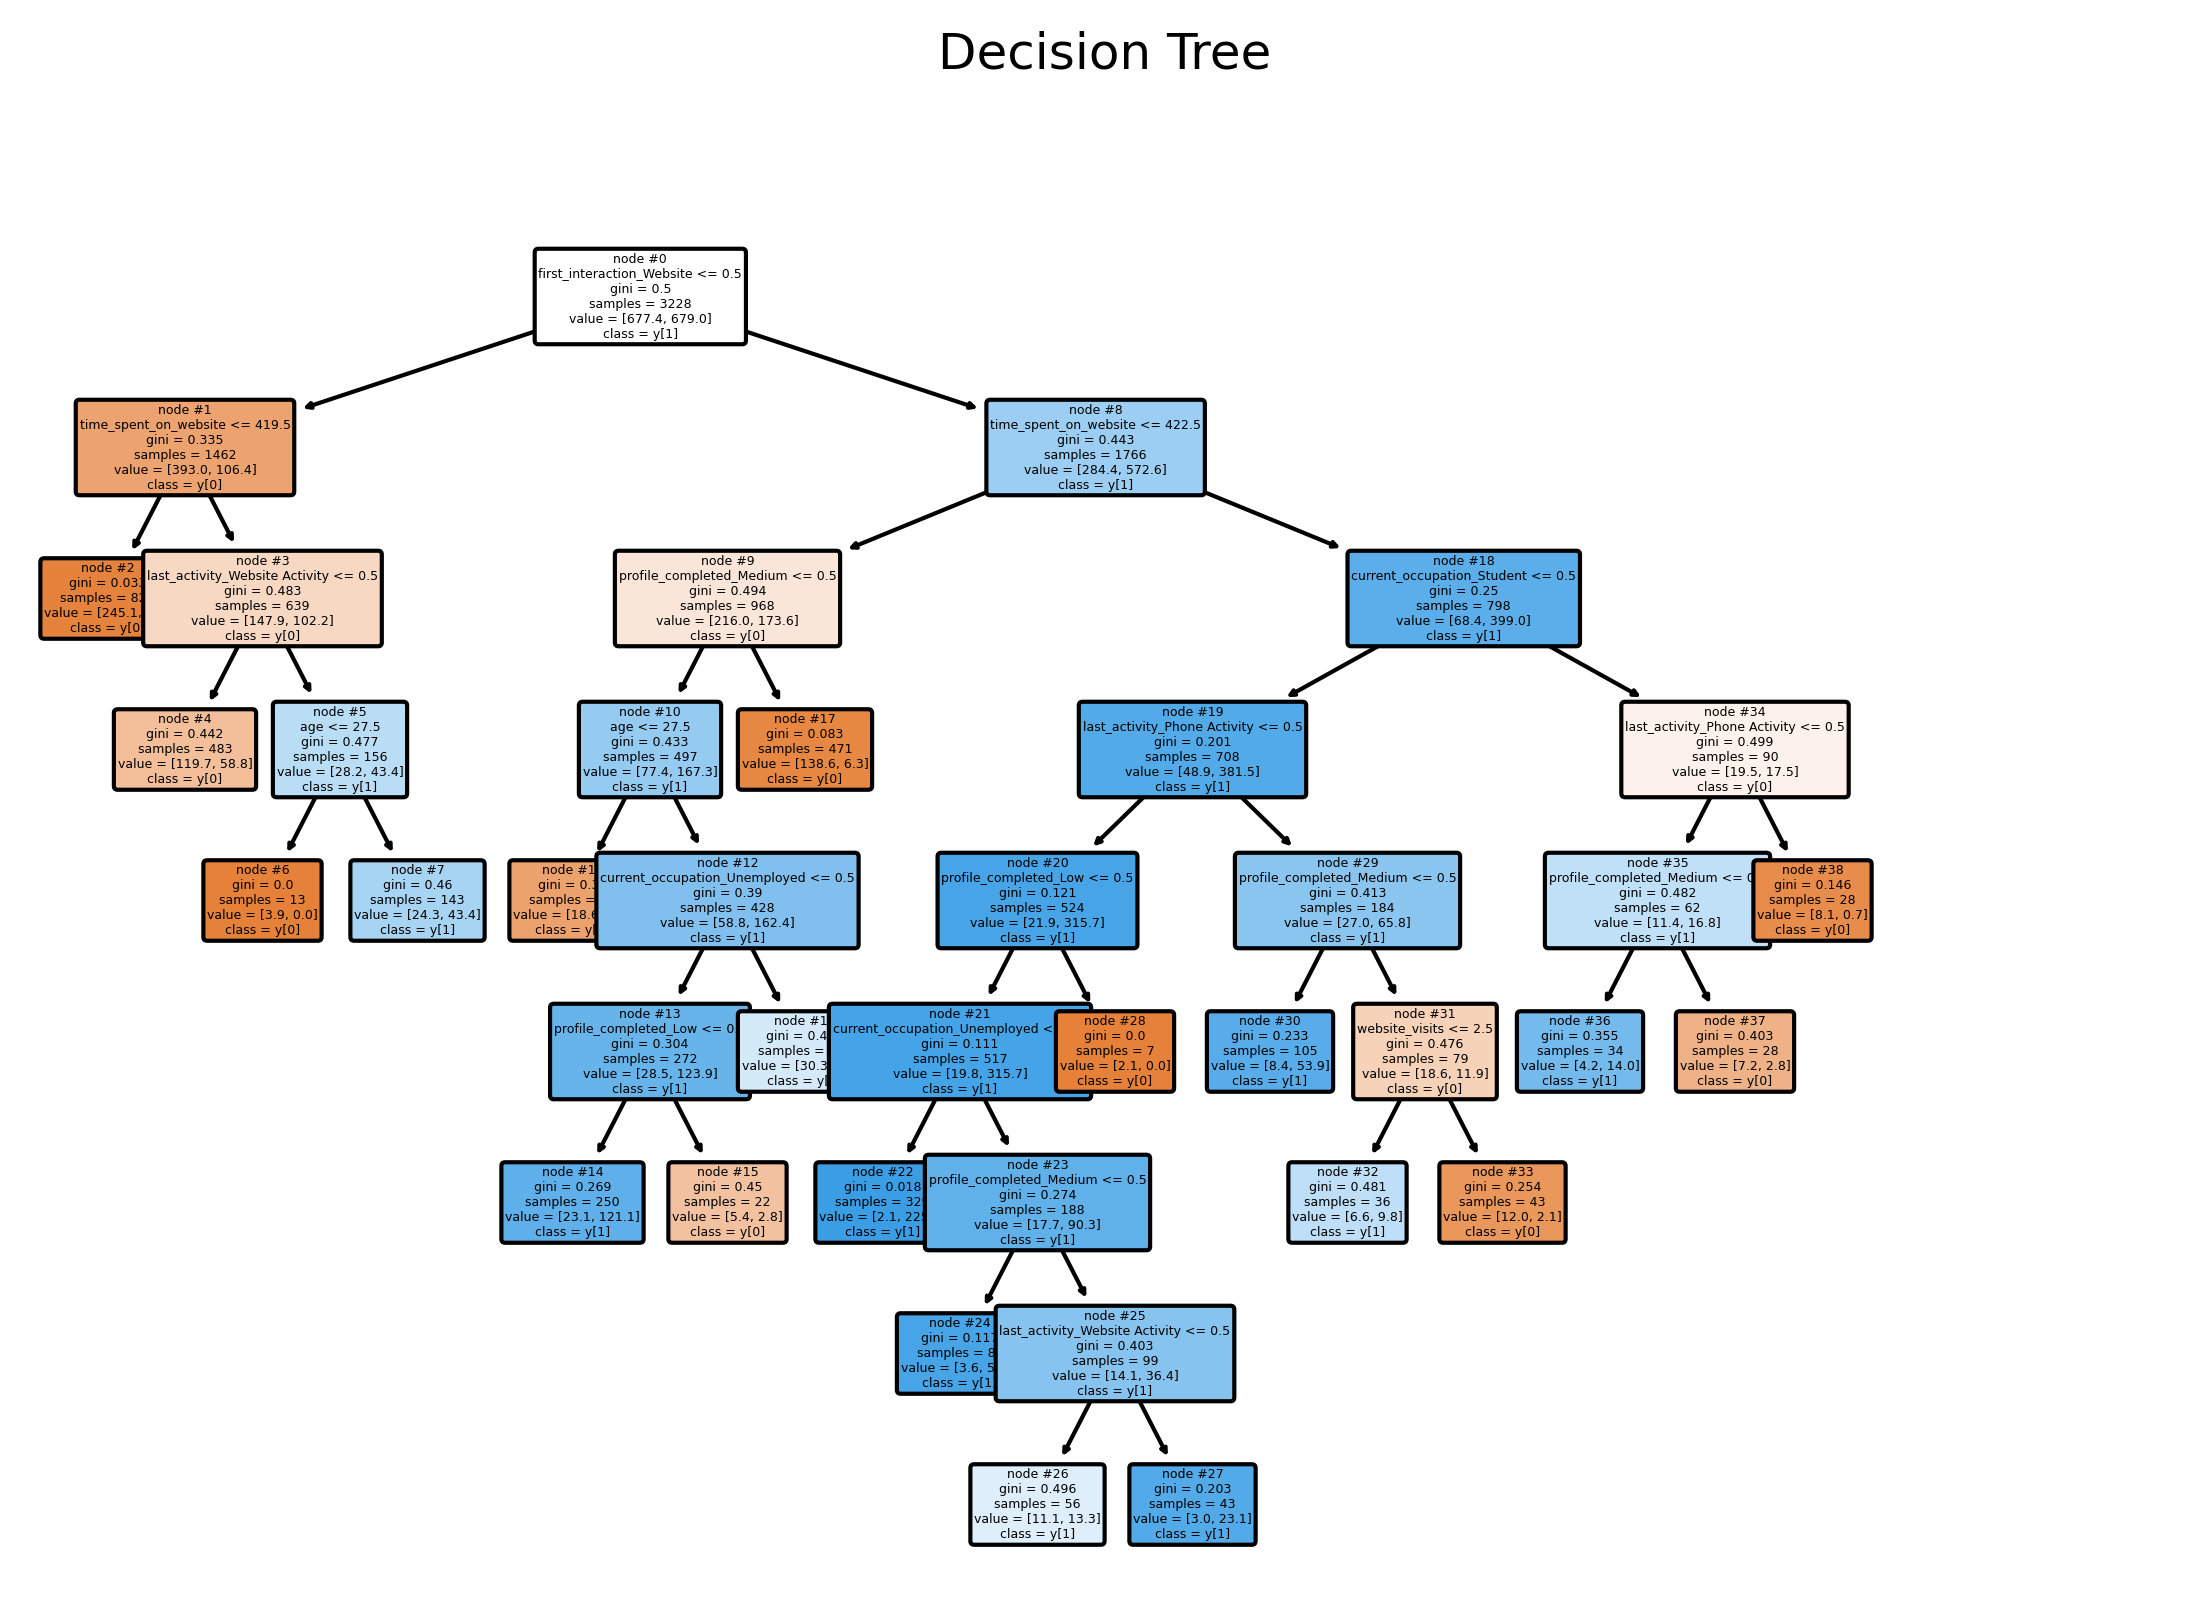

In [144]:
features = list(X_test.columns)

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6), dpi = 300) 

# Plot the decision tree
tree.plot_tree(dm, 
               feature_names=features, 
               filled=True, 
               fontsize=3, 
               rounded = True, 
               node_ids=True, 
               class_names=True
)

#plt.savefig('imagename.png')
plt.title('Decision Tree')

# Apply tight layout
plt.tight_layout(pad=3.0)  # Adjust the padding between plots
plt.show()


<Figure size 800x600 with 0 Axes>

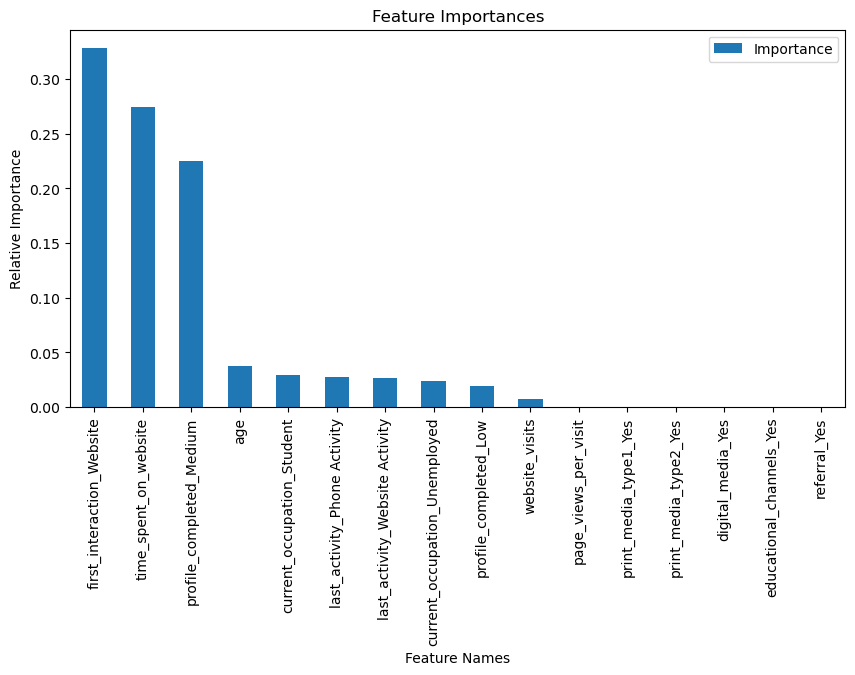

In [145]:
importances = dm.feature_importances_

plt.figure(figsize = (8, 6))
pd.DataFrame(importances, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False).plot(kind = 'bar')
plt.title('Feature Importances')
plt.xlabel('Feature Names')
plt.ylabel('Relative Importance')
plt.show();

#### Observations:

*   The most important features are first_interaction_website, time_spent_on_website, profile_completed_medium.

*   age, current_occupation_student, last_activity_phone_activity, last_activity_website_activity, current_occupation_unemployed, profile_completed_low, wesite_visits have low importance.

*   The rest of the features have zero importance in explaining status.

## Building a Random Forest model

In [146]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

# Fitting the model
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2258
           1       1.00      1.00      1.00       970

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



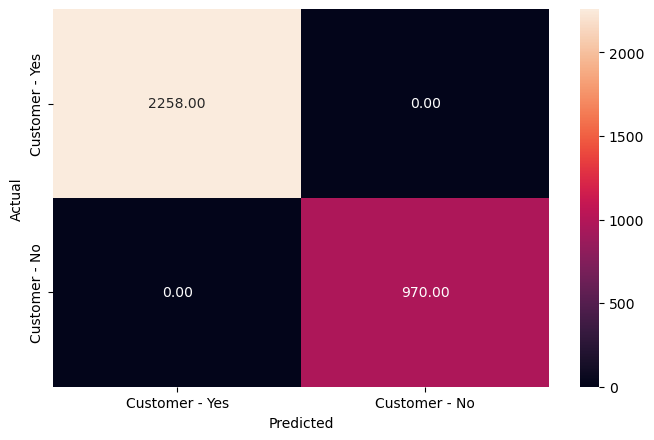

In [147]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

In [148]:
round(sklearn.metrics.mean_absolute_error(rf_estimator.predict(X_train), y_train), 2)

0.0

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       977
           1       0.77      0.68      0.72       407

    accuracy                           0.85      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.85      0.84      1384



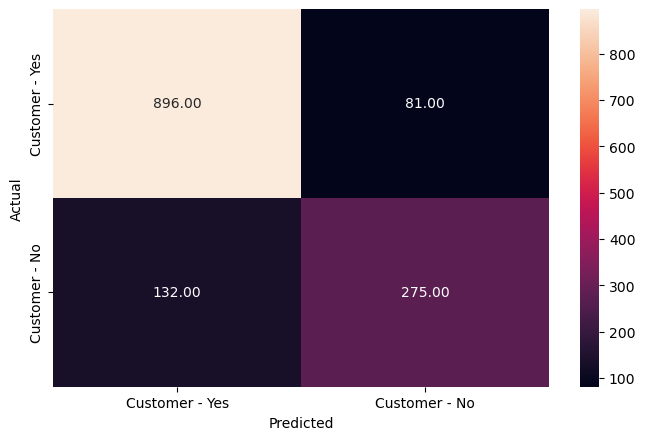

In [149]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)


In [150]:
round(sklearn.metrics.mean_absolute_error(rf_estimator.predict(X_test), y_test), 2)

15.02

In [151]:
rf_estimator_probs = rf_estimator.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

In [152]:
# Calculate roc auc. A perfect classifier will have roc_auc = 1 and a purely random classifier will have roc_auc = 0.5
roc_value = roc_auc_score(y_test, rf_estimator_probs)
round(roc_value, 2)

0.91

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, rf_estimator_probs)
roc_auc = roc_auc_score(y_test, rf_estimator_probs)

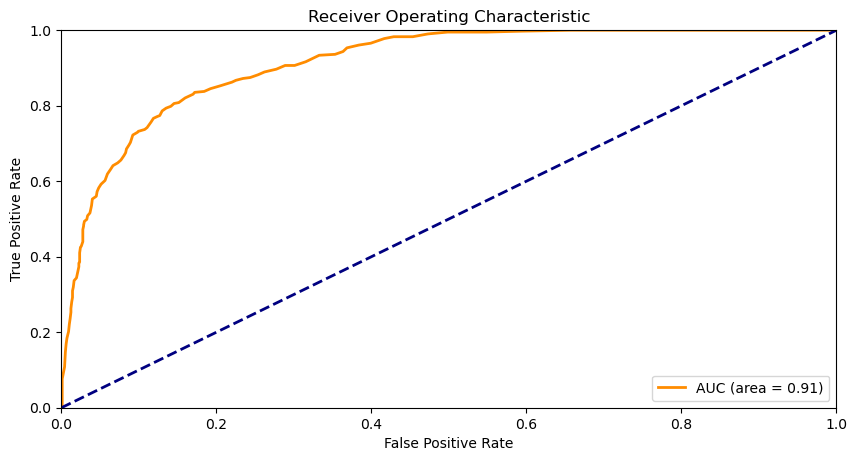

In [154]:
# the AUC score represents the likelihood that the classifier will rank 
# a randomly chosen positive instance higher than a randomly chosen negative one.

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [155]:
X_train.columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'],
      dtype='object')

#### Observations:

*   The random forest is still overfitting somewhat but significantly outperforms the single decision tree.

## Feature importances

<Figure size 800x600 with 0 Axes>

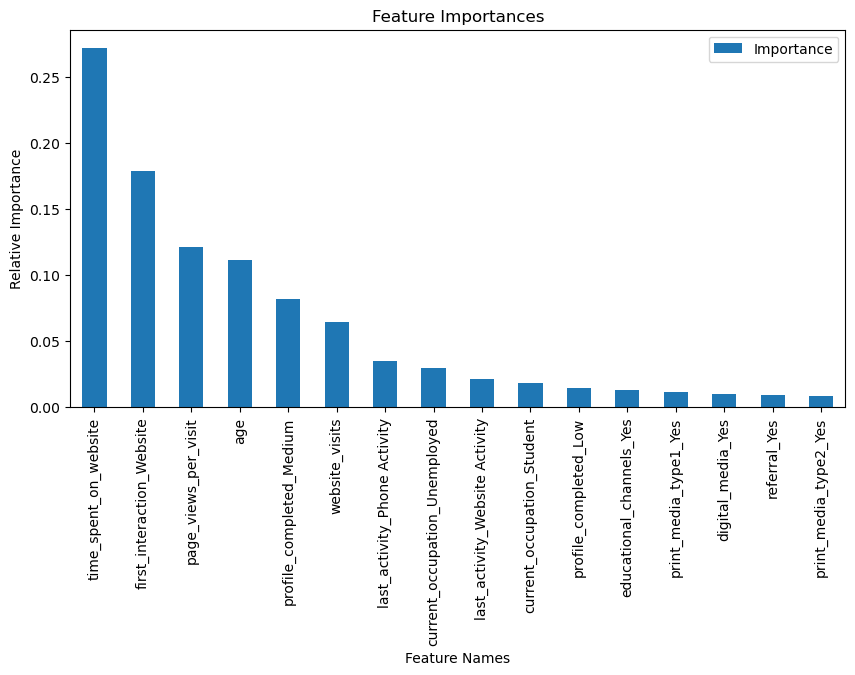

In [156]:
importances = rf_estimator.feature_importances_

plt.figure(figsize = (8, 6))
pd.DataFrame(importances, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False).plot(kind = 'bar')
plt.title('Feature Importances')
plt.xlabel('Feature Names')
plt.ylabel('Relative Importance')
plt.show();

#### Observations:

* Feature importance results is more robust under the Random Forest classifier.

* The five most important features for the Random Forest classifier are time_spent_on_website, first_interaction_website, page_views_per_visit, age, and profile_completed_medium.

*   Unlike the output for the Decision Tree Classifier, all features reflect some level of importance.

*   We can decide to keep features > 0.05 and eliminate from our model the features which had very low to no importance.



## Do we need to prune the tree?

#### Observations:

*   The 'Random forests' algorithm normally works well with default parameters.

*   However, tuning may still be needed. One way to estimate the optimal parameters is through grid search.

In [157]:
%%time 
rf_estimator_tuned = RandomForestClassifier(random_state = 42)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 140], # number of trees in the forest before averaging the predictions
              "criterion": ["entropy","gini"], # criterion that measures the quality of the split
              "class_weight": [{0: 0.3, 1: 0.7}, "balanced"],
              "max_depth": [3, 8], # maximum depth of the tree
              "min_samples_leaf": [10, 35], # minimum number of leaves required to split an internal node
              "max_features": [0.2, 1], # maximum number of features rused for splitting a node
              "max_samples": [0.8, 1], # minimum number of samples to be present at the leaf
             }

# Initialize GridSearchCV with the RandomForestClassifier and the grid of parameters
grid_search = GridSearchCV(estimator=rf_estimator_tuned, param_grid=parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# The best_estimator_ attribute will give you the tuned model with the best combination of parameters
best_rf_model = grid_search.best_estimator_

# training the new ML Model
#rf_estimator_tuned.fit(X_train, y_train)

best_rf_model.fit(X_train, y_train)

Wall time: 3min 49s


RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=8, max_features=0.2, max_samples=0.8,
                       min_samples_leaf=10, random_state=42)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2258
           1       0.71      0.88      0.79       970

    accuracy                           0.86      3228
   macro avg       0.83      0.86      0.84      3228
weighted avg       0.87      0.86      0.86      3228



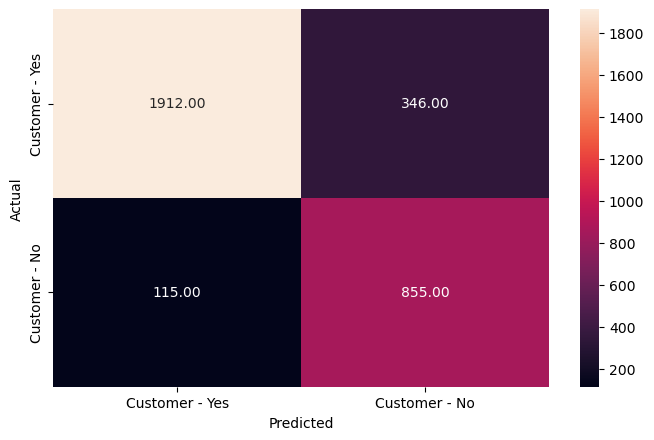

In [158]:
# Checking performance on the training data
y_pred_train_rf_tuned = best_rf_model.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       977
           1       0.66      0.83      0.74       407

    accuracy                           0.83      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.85      0.83      0.83      1384



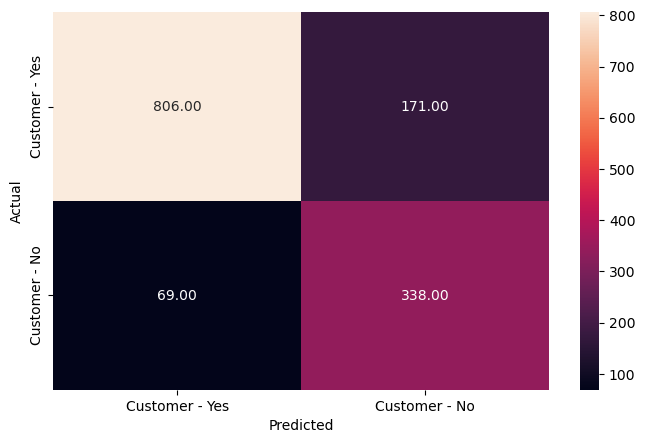

In [159]:
# Checking performance on the testing data
y_pred_test_rf_tuned = best_rf_model.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [160]:
X_train.columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

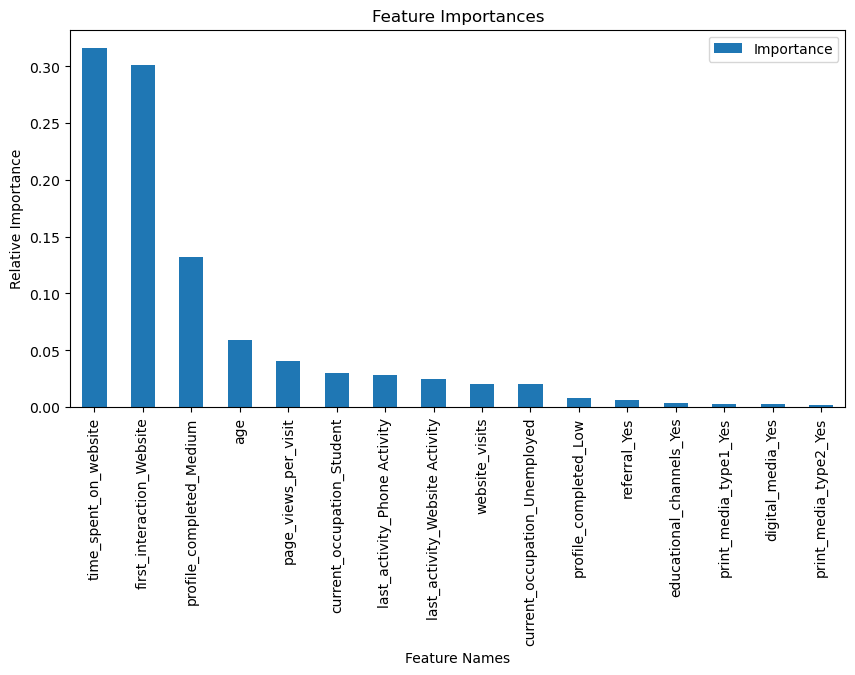

In [161]:
importances = best_rf_model.feature_importances_

plt.figure(figsize = (8, 6))
pd.DataFrame(importances, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False).plot(kind = 'bar')
plt.title('Feature Importances')
plt.xlabel('Feature Names')
plt.ylabel('Relative Importance')
plt.show();

#### Observations:

*   After pruning, Recall has improved on the test data from 0.68 to 0.83.

*   The five most important features for the Best Random Forest classifier are time_spent_on_website, first_interaction_website, profile_completed_medium, age and page_views_per_visit.

*   Unlike the output for the Decision Tree Classifier, all features reflect some level of importance.

*   We can decide to keep features > 0.05 and eliminate from our model the features which had very low to no importance.

## Confidence of predictions

In [162]:
# Generate predictions for X_train using each individual estimator
estimator_predictions = np.stack([tree.predict(X_train) for tree in best_rf_model.estimators_])

# Calculate the mean prediction across all estimators
X_train['predictions_mean'] = estimator_predictions.mean(axis=0)

# Calculate the standard deviation of the predictions across all estimators
X_train['predictions_std'] = estimator_predictions.std(axis=0)

Text(0.5, 1.0, 'Distribution of predictions std')

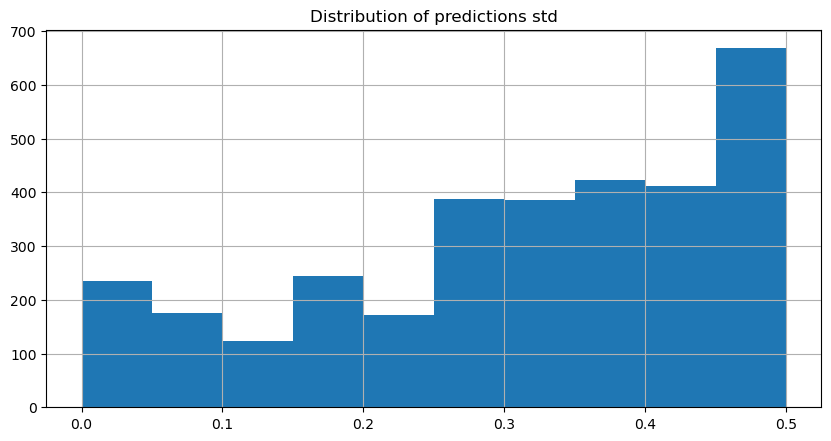

In [163]:
ax = X_train.predictions_std.hist(bins = 10)
ax.set_title('Distribution of predictions std')

In [164]:
X_train.columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes', 'predictions_mean',
       'predictions_std'],
      dtype='object')

In [165]:
# Check the number of features in the training dataset
print("Number of features in the training dataset:", X_train.shape[1])

# Check the number of features in the prediction dataset
print("Number of features in the prediction dataset:", X_test.shape[1])

# If the number of features does not match, align the prediction dataset with the training dataset

Number of features in the training dataset: 18
Number of features in the prediction dataset: 16


In [166]:
X_train.drop(['predictions_mean', 'predictions_std'], axis=1, inplace=True)

In [167]:
X_train.columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'],
      dtype='object')

## Partial dependence

Using tree interpreter, each prediction is decomposed into 3 components: prediction, bias, and feature contribution.

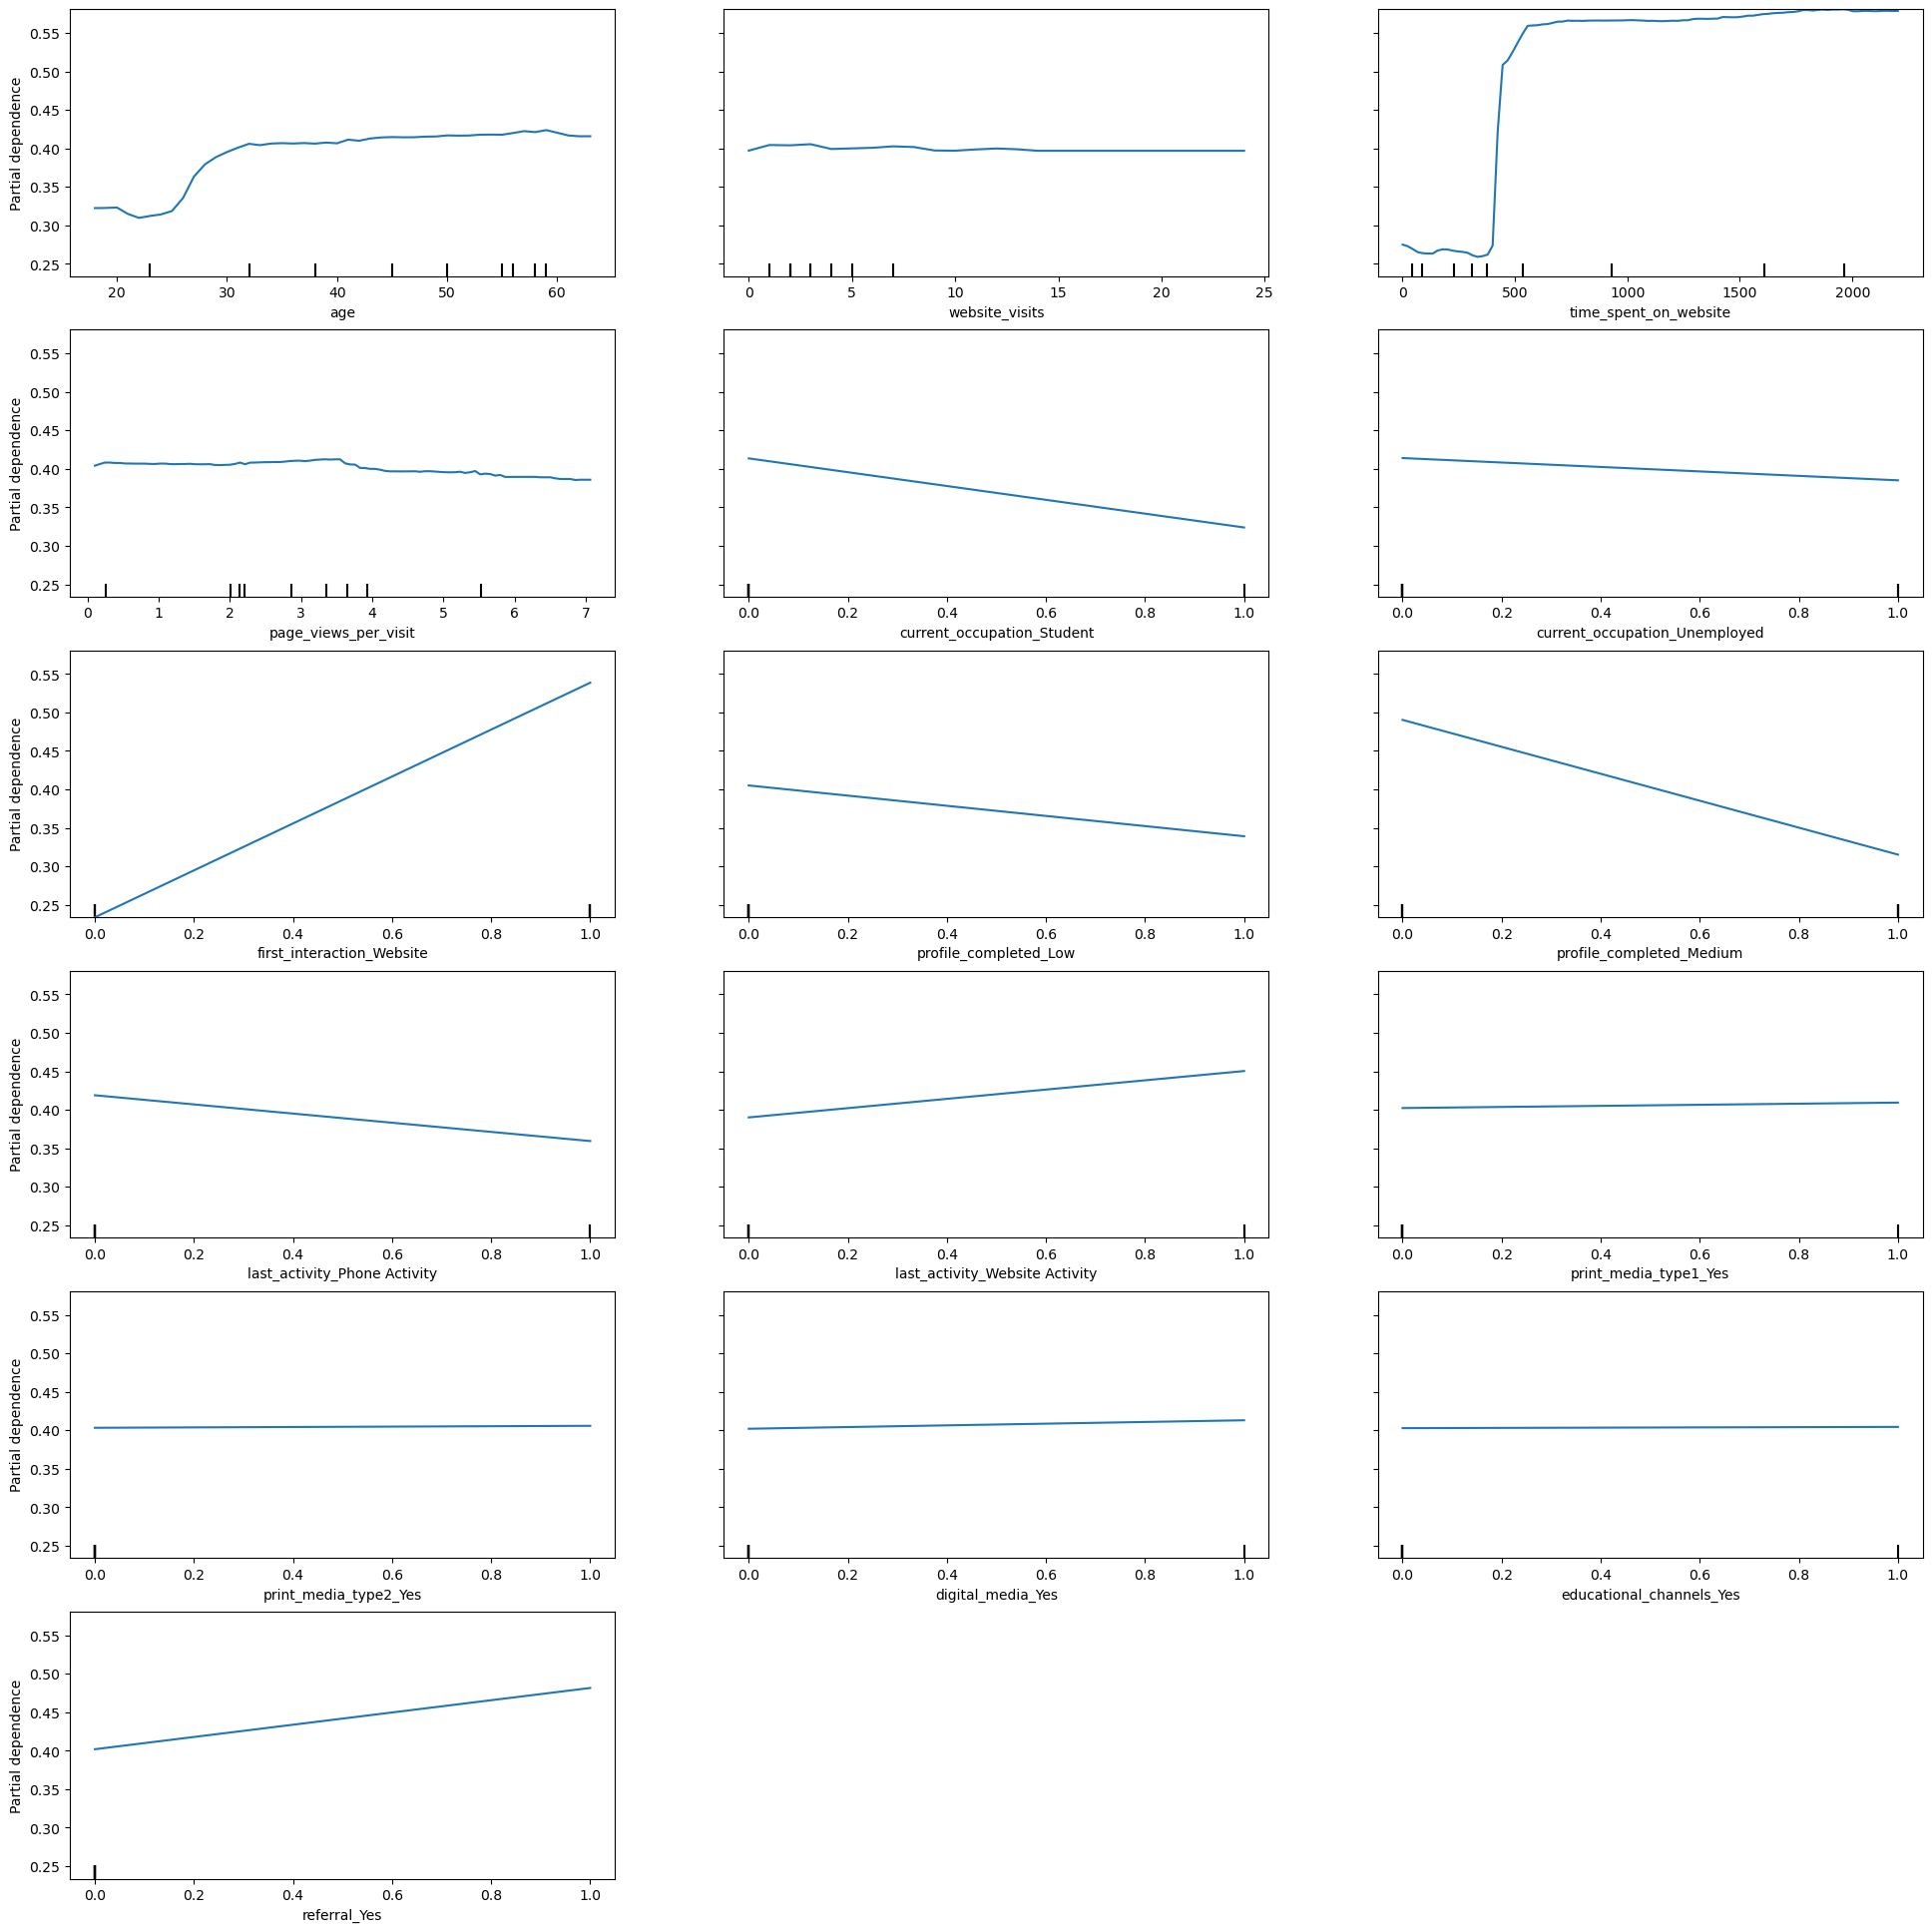

In [168]:
# Compute partial dependence plots for features of interest
features = ['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'] 

rcParams['figure.figsize'] = 20,20
plot_partial_dependence(best_rf_model, X_test, features)

# Use treeinterpreter to interpret a single prediction
# Shows the response of the model to one variable, with the other variables held constant.
# Row is a single-row of the input data

row = X_test.iloc[30] # Select a specific row of the test set

prediction, bias, contributions = ti.predict(best_rf_model, row.values.reshape(1, -1))

# Apply tight layout

plt.tight_layout(pad=3.0) # Adjust the padding between plots
plt.show()

# Note that we must interpret these plots with caution as they don't show interactions

#### Observations:

*   The number of paid customers is increases age increases between 20 and 30 and before leveling off.

*   The number of paid customers increases sharply with a rise in the time_spent_on_website after approximately 400 minutes and then levels off after 500 minutes.

*   The number of paid customers decreases steadiliy for increases in current_occupation_student, current_occupation_unemployed, profile_completed_low, profile_completed_medium and last_activity_phone_activity.

*   The number of paid customers increases steadiliy for increases in first_interaction_website, last_activity_website and referral_yes.


## Interaction interpretation

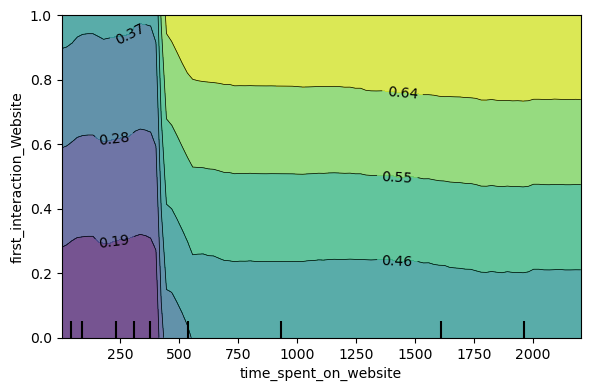

In [169]:
rcParams['figure.figsize'] = 6.7,4.27
plot_partial_dependence(best_rf_model, X_test, [(2, 6)])

#### Observations:

*   If time_spent_on_website is above 400, first_interaction_website has no effect on the number of paid customers. However, for levels of time_spent_on_website below this threshold, first_interaction_website has a positive impact on status.


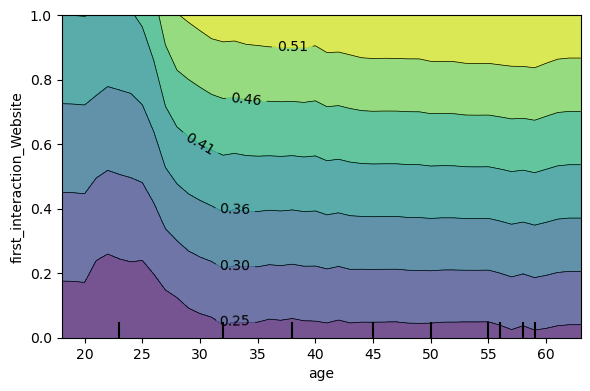

In [174]:
rcParams['figure.figsize'] = 6.7,4.27
plot_partial_dependence(best_rf_model, X_test, [(0, 6)])

#### Observations:

*   The number of paid customers is increases with first_interaction_website as age rises up to 20 and then decreases with the rise in age up to age 32 before remaining flat after this threshold.

*   The number of paid customers increases with an increase in age up to age 37 and then levels off.

### How was the prediction made (per observation)?

In [171]:
row = X_test.iloc[[30]]
row_cmp_df = row.T
row_cmp_df.columns = ['row']
row_cmp_df['avg_value'] = X_test.mean()
row_cmp_df = row_cmp_df.applymap(lambda x: round(x, 3))
row_cmp_df

,row,avg_value
age,61.00,45.75
website_visits,3.00,3.57
time_spent_on_website,1910.00,725.85
page_views_per_visit,3.76,3.06
current_occupation_Student,0.00,0.13
current_occupation_Unemployed,1.00,0.29
first_interaction_Website,1.00,0.56
profile_completed_Low,0.00,0.02
profile_completed_Medium,1.00,0.50
last_activity_Phone Activity,1.00,0.27


In [172]:
rownames = X_test.values[None,1]
prediction, bias, contributions = ti.predict(model, rownames)
contributions = [contributions[0][i][0] for i in range(len(contributions[0]))]
colnames = X_test.columns[0:].values

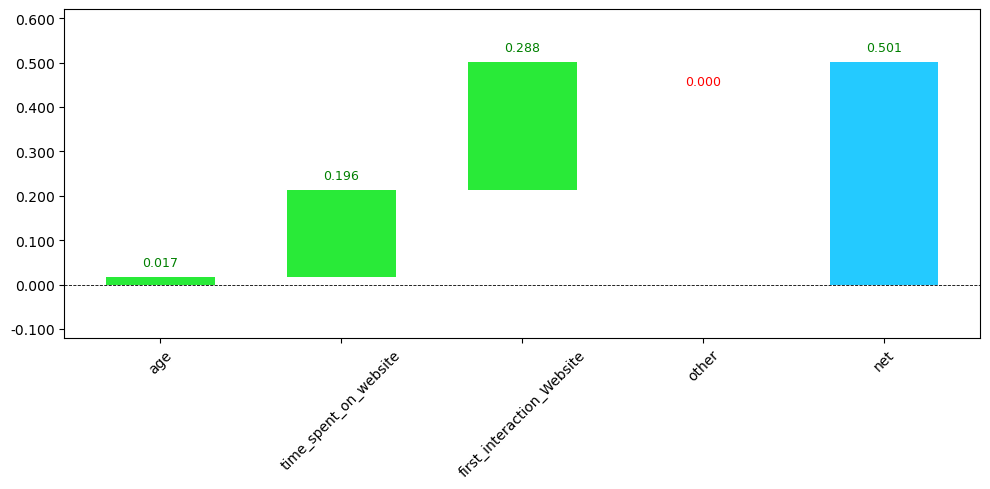

In [175]:
# waterfall chart (The waterfall chart is a graphical representation that shows the cumulative effect 
# of sequentially introduced positive or negative values)

import waterfall_chart
rcParams['figure.figsize'] = 10,5

my_plot=waterfall_chart.plot(colnames, contributions, rotation_value=45, threshold=0.05,formatting='{:,.3f}')

## Actionable Insights and Recommendations

Based on the data provided for ExtraaLearn, here are some actionable insights and recommendations:
1.	Target Middle-Aged Demographic: Since the average age of leads is 46, marketing efforts should be tailored to appeal to middle-aged individuals who are likely seeking upskilling or reskilling opportunities.
2.	Focus on High-Conversion Age Groups: Given that leads with a higher median and inter-quartile range age are more likely to convert, consider creating targeted campaigns for these age groups to improve conversion rates.
3.	Engage Younger Students Differently: For student leads that are significantly younger, develop separate strategies or course offerings that cater to their interests and career aspirations.
4.	Optimize Website Experience: The skewness in website visits and page views suggests that improving the user experience on the website could lead to higher engagement. Investigate the outliers to understand what drives prolonged engagement and replicate this across the site.
5.	Enhance Professional Category Outreach: Since most leads are professionals, and they have a higher conversion rate, focus marketing and course development efforts on this demographic.
6.	Improve Mobile App Engagement: Although slightly more leads visit the website, don't neglect the mobile app. Ensure the app provides a seamless and engaging user experience to capture this segment of the market.
7.	Encourage Profile Completion: With higher conversion rates among those who complete their profiles, incentivize leads to provide more personal details, possibly through tangible rewards such as discounts on courses, free trail periods, or access to exclusive content.
8.	Leverage Effective Communication Channels: Email and phone communications are more common, but the website is a stronger conversion tool. Enhance the website's interactivity and call-to-action features to encourage more conversions.
9.	Reevaluate Marketing Channels: Traditional advertising channels like newspapers and magazines are less effective. Shift focus to digital media and educational channels where more leads are acquired and conversion rates are higher.
10.	Maximize Referral Programs: Referrals have the highest conversion rate, despite being a small percentage of leads. Invest in a referral program to encourage current customers to refer new leads.
11.	Analyze and Adapt to User Behavior: Leads that convert spend more time on the website, indicating that engagement is key. Use analytics to understand what keeps users on the site longer and apply these insights to keep potential leads engaged.
12.	Utilize Data for Machine Learning: The Random Forest classifier identified key features that influence conversion. Use these insights to refine the predictive model and further target potential customers effectively.
13.	Age and Engagement Correlation: There is a correlation between age, engagement (time spent on the website), and conversion. Tailor content and user experience to increase engagement within the most responsive age groups.
14.	Monitor and Optimize for Conversion: Regularly track the performance of different demographics and their behaviors on the website to continuously refine and optimize strategies for higher conversion rates.



By implementing these recommendations, ExtraaLearn can better align its marketing and engagement strategies with the behaviors and preferences of its leads, ultimately increasing the conversion rate of potential customers.